<h2>1. INTRODUCTION</h2>

<html>
<head>
<h3>1.1 Project Overview</h3>
    <p>This project aims to investigate the intricate relationship between population age distribution and various economic factors in Malaysia, using data provided by Bank Negara. The study explores how age dependency ratios, population structure, and other demographic variables impact critical economic indicators such as Gross Capital Formation (GCF), Gross Domestic Savings (GDS), and GDP. Furthermore, it examines the role of urban and rural population growth, lending interest rates, and their effects on savings and capital formation.</p>

<body>

<h3>1.2 Problem Statement</h3>
    <p>Analyze the Relationships Between Population Age Distribution, Economic Factors, and their impact on Gross Capital Formation and Savings.<br>
    What are the relationships between population age distribution, rural and urban population growth, lending interest rates, and GDP per capita on gross capital formation and savings?
How do these demographic and economic factors interact, and which variables show the strongest influence on capital formation and domestic savings?</p> 

</head>
</body>
</html>


<body>
    <h3>1.3 DataSet Description</h3> 
    <h4>List of Columns</h4>
    <ol>
        <li><strong>Age Dependency Ratio, Young (% of Working-Age Population)</strong><br>
        Definition: The age dependency ratio for young people measures the proportion of individuals aged 0–14 years relative to the working-age population (15–64 years). It indicates the economic burden posed by the younger non-working population on the working-age population.
        </li>
        <li><strong>Age Dependency Ratio, Old (% of Working-Age Population)</strong><br>
        Definition: This ratio measures the proportion of individuals aged 65 and older relative to the working-age population (15–64 years). It reflects the economic burden of the elderly on the working-age population.
        </li>
        <li><strong>Gross Capital Formation (Current USD)</strong><br>
        Definition: Gross capital formation refers to the total value of a country's investments in physical assets, such as infrastructure, machinery, and buildings, measured in current US dollars.
        </li>
        <li><strong>Gross Domestic Savings (Current USD)</strong><br>
        Definition: Gross domestic savings represent the portion of a country's income that is not consumed or spent by the government or households, measured in current US dollars.
        </li>
        <li><strong>Urban Population Growth (Annual %)</strong><br>
        Definition: Urban population growth is the annual percentage increase in the number of people living in urban areas.
        </li>
        <li><strong>Rural Population Growth (Annual %)</strong><br>
        Definition: This represents the annual percentage change in the rural population, or the number of people living in non-urban areas.
        </li>
        <li><strong>Lending Interest Rate (%)</strong><br>
        Definition: The lending interest rate is the annual percentage charged by financial institutions on loans to borrowers.
        </li>
        <li><strong>GDP per Capita (Current USD)</strong><br>
        Definition: GDP per capita is the total economic output (Gross Domestic Product) of a country divided by its population, expressed in current US dollars.
        </li>           
    </ol>
    <h4>List of Rows</h4>
    <p><strong>Year:</strong>1970-2023</p>
</body>



<h4>OBJECTIVES</h4>
<ol>
    <li><strong>Investigating How Age Dependency Ratios Affect Gross Capital Formation and Domestic Savings</strong><br>
    Age Dependency Ratio, Young (% of Working-Age Population) and Age Dependency Ratio, Old (% of Working-Age Population) vs Economic Growth Indicators (Gross Capital Formation (Current USD), Gross Domestic Savings (Current USD)</li>
    <li><strong>Assessing the Influence of Rural and Urban Population Growth on Economic Formation</strong><br>
    Urban Population Growth (Annual %) and Rural Population Growth (Annual %) vs Gross Capital Formation (Current USD)</li>
    <li><strong>Exploring How Lending Interest Rates Impact Savings and Capital Formation</strong><br>
    Lending Interest Rate (%) vs Economic Growth Indicators (Gross Capital Formation (Current USD), Gross Domestic Savings (Current USD)</li>
    <li><strong>Investigating How GDP Per Capita Influences Savings and Capital Formation</strong><br>
    GDP per Capita (Current USD) vs Gross Capital Formation (Current USD) and Gross Domestic Savings (Current USD)</li>
</ol>

<h4>HYPOTHESIS</h4>
<ul>
    <li><strong>Objective 1</strong><br>
    - An increase in the age dependency ratio (young) will have a negative impact on gross capital formation and gross domestic savings, as a higher ratio implies a larger proportion of non-working individuals relying on the working-age population.<br>
    - A higher age dependency ratio (old) will similarly reduce gross capital formation and gross domestic savings, as more resources are directed towards supporting the elderly population.</li>
    <li><strong>Objective 2</strong><br>
    - Higher urban population growth is positively correlated with an increase in gross capital formation, as urbanization typically drives economic investments in infrastructure and business development.<br>
    - Rural population growth will have a weaker or even negative impact on gross capital formation, as rural areas may have slower economic growth compared to urban areas.</li>
    <li><strong>Objective 3</strong><br>
    - Higher lending interest rates will have a negative effect on gross capital formation, as increased borrowing costs may deter investments.<br>
    - Higher lending interest rates will positively influence gross domestic savings, as higher rates encourage individuals and institutions to save more to benefit from the interest.</li>
    <li><strong>Objective 3</strong><br>
    - GDP per capita will be positively correlated with gross capital formation, as a higher GDP per capita indicates greater wealth and economic activity, leading to more investments.<br>
    - GDP per capita will positively influence gross domestic savings, as wealthier populations tend to save more, creating higher domestic savings rates.</li>
</ul>

<h2>2. Data Loading and Exploration</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import leaves_list
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### 2.1 Data Import

In [2]:
data = pd.read_csv('bank_negara.csv')
data

Country Name Country Code  \
0        Malaysia          MYS   
1        Malaysia          MYS   
2        Malaysia          MYS   
3        Malaysia          MYS   
4        Malaysia          MYS   
...           ...          ...   
1487     Malaysia          MYS   
1488     Malaysia          MYS   
1489     Malaysia          MYS   
1490     Malaysia          MYS   
1491     Malaysia          MYS   

                                         Indicator Name     Indicator Code  \
0     Internally displaced persons, total displaced ...        VC.IDP.TOCV   
1              Voice and Accountability: Standard Error         VA.STD.ERR   
2           Voice and Accountability: Number of Sources          VA.NO.SRC   
3     High-technology exports (% of manufactured exp...  TX.VAL.TECH.MF.ZS   
4                       Export value index (2015 = 100)  TX.VAL.MRCH.XD.WD   
...                                                 ...                ...   
1487       Average precipitation in depth (mm per year)     AG.LND.PRCP.MM   
1488  Land area where elevation is below 5 meters (%...     AG.LND.EL5M.ZS   
1489  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.K2   
1490                  Arable land (hectares per person)  AG.LND.ARBL.HA.PC   
1491  Fertilizer consumption (kilograms per hectare ...     AG.CON.FERT.ZS   

      1960         1961         1962         1963         1964         1965  \
0      NaN          NaN          NaN          NaN          NaN          NaN   
1      NaN          NaN          NaN          NaN          NaN          NaN   
2      NaN          NaN          NaN          NaN          NaN          NaN   
3      NaN          NaN          NaN          NaN          NaN          NaN   
4      NaN          NaN          NaN          NaN          NaN          NaN   
...    ...          ...          ...          ...          ...          ...   
1487   NaN  2875.000000  2875.000000  2875.000000  2875.000000  2875.000000   
1488   NaN          NaN          NaN          NaN          NaN          NaN   
1489   NaN          NaN          NaN          NaN          NaN          NaN   
1490   NaN     0.093469     0.093456     0.093349     0.091787     0.085066   
1491   NaN    98.745263    99.760910    98.194464   102.440137   126.205809   

      ...          2015         2016         2017         2018         2019  \
0     ...           NaN          NaN          NaN          NaN          NaN   
1     ...      0.129708     0.125431     0.125948     0.130540     0.121527   
2     ...     13.000000    13.000000    13.000000    11.000000    11.000000   
3     ...     48.470783    49.050916    51.120222    53.179291    51.591351   
4     ...    100.000000    94.894407   109.091366   123.757555   119.126469   
...   ...           ...          ...          ...          ...          ...   
1487  ...   2875.000000  2875.000000  2875.000000  2875.000000  2875.000000   
1488  ...      6.890262          NaN          NaN          NaN          NaN   
1489  ...  20980.596964          NaN          NaN          NaN          NaN   
1490  ...      0.026564     0.026200     0.025832     0.025494     0.025180   
1491  ...   1896.164108  1994.114540  2009.637058  1952.092022  1346.369237   

             2020         2021       2022  2023  Unnamed: 68  
0             NaN          NaN        NaN   NaN          NaN  
1        0.126932     0.127789   0.125400   NaN          NaN  
2       10.000000    11.000000  11.000000   NaN          NaN  
3       53.811916    51.677870  28.204262   NaN          NaN  
4      117.091955   149.550292        NaN   NaN          NaN  
...           ...          ...        ...   ...          ...  
1487  2875.000000          NaN        NaN   NaN          NaN  
1488          NaN          NaN        NaN   NaN          NaN  
1489          NaN          NaN        NaN   NaN          NaN  
1490     0.024880     0.024602        NaN   NaN          NaN  
1491  1589.850811  2146.253789        NaN   NaN          NaN  

[149

#### 2.2 Data Overview

In [3]:
data.head(10)

Country Name Country Code  \
0     Malaysia          MYS   
1     Malaysia          MYS   
2     Malaysia          MYS   
3     Malaysia          MYS   
4     Malaysia          MYS   
5     Malaysia          MYS   
6     Malaysia          MYS   
7     Malaysia          MYS   
8     Malaysia          MYS   
9     Malaysia          MYS   

                                      Indicator Name     Indicator Code  \
0  Internally displaced persons, total displaced ...        VC.IDP.TOCV   
1           Voice and Accountability: Standard Error         VA.STD.ERR   
2        Voice and Accountability: Number of Sources          VA.NO.SRC   
3  High-technology exports (% of manufactured exp...  TX.VAL.TECH.MF.ZS   
4                    Export value index (2015 = 100)  TX.VAL.MRCH.XD.WD   
5  Merchandise exports to low- and middle-income ...  TX.VAL.MRCH.R6.ZS   
6  Merchandise exports to low- and middle-income ...  TX.VAL.MRCH.R2.ZS   
7                  Merchandise exports (current US$)  TX.VAL.MRCH.CD.WT   
8  Insurance and financial services (% of commerc...  TX.VAL.INSF.ZS.WT   
9  Agricultural raw materials exports (% of merch...  TX.VAL.AGRI.ZS.UN   

           1960          1961          1962          1963          1964  \
0           NaN           NaN           NaN           NaN           NaN   
1           NaN           NaN           NaN           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3           NaN           NaN           NaN           NaN           NaN   
4           NaN           NaN           NaN           NaN           NaN   
5           NaN           NaN           NaN           NaN           NaN   
6           NaN           NaN           NaN           NaN           NaN   
7  1.187000e+09  1.058000e+09  1.065000e+09  1.088000e+09  1.105000e+09   
8           NaN           NaN           NaN           NaN           NaN   
9           NaN           NaN           NaN           NaN  5.182794e+01   

           1965  ...          2015          2016          2017          2018  \
0           NaN  ...           NaN           NaN           NaN           NaN   
1           NaN  ...  1.297076e-01  1.254307e-01  1.259481e-01  1.305398e-01   
2           NaN  ...  1.300000e+01  1.300000e+01  1.300000e+01  1.100000e+01   
3           NaN  ...  4.847078e+01  4.905092e+01  5.112022e+01  5.317929e+01   
4           NaN  ...  1.000000e+02  9.489441e+01  1.090914e+02  1.237576e+02   
5           NaN  ...  2.115086e+00  1.895461e+00  1.578245e+00  1.473394e+00   
6           NaN  ...  1.002028e+00  1.386921e+00  1.607903e+00  1.290532e+00   
7  1.236000e+09  ...  1.999520e+11  1.897430e+11  2.181300e+11  2.474550e+11   
8           NaN  ...  2.030857e+00  2.287978e+00  2.234138e+00  2.287094e+00   
9  4.966631e+01  ...  1.845002e+00  1.936988e+00  2.126964e+00  1.682455e+00   

           2019          2020          2021          2022          2023  \
0           NaN           NaN           NaN           NaN           NaN   
1  1.215269e-01  1.269317e-01  1.277895e-01  1.253995e-01           NaN   
2  1.100000e+01  1.000000e+01  1.100000e+01  1.100000e+01           NaN   
3  5.159135e+01  5.381192e+01  5.167787e+01  2.820426e+01           NaN   
4  1.191265e+02  1.170920e+02  1.495503e+02           NaN           NaN   
5  1.540691e+00  1.614697e+00           NaN           NaN           NaN   
6  1.265754e+00  1.290192e+00           NaN           NaN           NaN   
7  2.381950e+11  2.347660e+11  2.994250e+11  3.520940e+11  3.128460e+11   
8  2.433114e+00  4.750265e+00  5.062464e+00  3.740169e+00           NaN   
9  1.699092e+00  1.564482e+00  1.433594e+00  1.193418e+00  1.178172e+00   

   Unnamed: 68  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
5          NaN  
6          NaN  
7          NaN  
8          NaN  
9          NaN  

[10 rows x 69 columns]

In [4]:
data.tail(10)

Country Name Country Code  \
1482     Malaysia          MYS   
1483     Malaysia          MYS   
1484     Malaysia          MYS   
1485     Malaysia          MYS   
1486     Malaysia          MYS   
1487     Malaysia          MYS   
1488     Malaysia          MYS   
1489     Malaysia          MYS   
1490     Malaysia          MYS   
1491     Malaysia          MYS   

                                         Indicator Name     Indicator Code  \
1482     Transport services (% of service imports, BoP)     BM.GSR.TRAN.ZS   
1483                   Goods imports (BoP, current US$)     BM.GSR.MRCH.CD   
1484  Communications, computer, etc. (% of service i...     BM.GSR.CMCP.ZS   
1485       Livestock production index (2014-2016 = 100)     AG.PRD.LVSK.XD   
1486  Agricultural machinery, tractors per 100 sq. k...     AG.LND.TRAC.ZS   
1487       Average precipitation in depth (mm per year)     AG.LND.PRCP.MM   
1488  Land area where elevation is below 5 meters (%...     AG.LND.EL5M.ZS   
1489  Rural land area where elevation is below 5 met...  AG.LND.EL5M.RU.K2   
1490                  Arable land (hectares per person)  AG.LND.ARBL.HA.PC   
1491  Fertilizer consumption (kilograms per hectare ...     AG.CON.FERT.ZS   

      1960         1961         1962         1963         1964         1965  \
1482   NaN          NaN          NaN          NaN          NaN          NaN   
1483   NaN          NaN          NaN          NaN          NaN          NaN   
1484   NaN          NaN          NaN          NaN          NaN          NaN   
1485   NaN     5.300000     5.510000     5.780000     6.280000     6.790000   
1486   NaN    21.199353    23.137734    24.972842    27.126335    31.034215   
1487   NaN  2875.000000  2875.000000  2875.000000  2875.000000  2875.000000   
1488   NaN          NaN          NaN          NaN          NaN          NaN   
1489   NaN          NaN          NaN          NaN          NaN          NaN   
1490   NaN     0.093469     0.093456     0.093349     0.091787     0.085066   
1491   NaN    98.745263    99.760910    98.194464   102.440137   126.205809   

      ...          2015          2016          2017          2018  \
1482  ...  2.613786e+01  2.444149e+01  2.680670e+01  2.678856e+01   
1483  ...  1.466871e+11  1.409855e+11  1.592701e+11  1.772296e+11   
1484  ...  4.024467e+01  4.259239e+01  4.099841e+01  3.909624e+01   
1485  ...  1.005900e+02  1.047700e+02  1.027800e+02  1.004500e+02   
1486  ...           NaN           NaN           NaN           NaN   
1487  ...  2.875000e+03  2.875000e+03  2.875000e+03  2.875000e+03   
1488  ...  6.890262e+00           NaN           NaN           NaN   
1489  ...  2.098060e+04           NaN           NaN           NaN   
1490  ...  2.656392e-02  2.620025e-02  2.583203e-02  2.549440e-02   
1491  ...  1.896164e+03  1.994115e+03  2.009637e+03  1.952092e+03   

              2019          2020          2021          2022          2023  \
1482  2.630135e+01  2.941335e+01  3.145040e+01  2.994789e+01           NaN   
1483  1.671495e+11  1.532329e+11  1.997759e+11  2.385129e+11  2.014687e+11   
1484  3.846178e+01  4.774061e+01  5.027026e+01  4.650937e+01           NaN   
1485  9.747000e+01  1.025300e+02  1.003900e+02  9.969000e+01           NaN   
1486           NaN           NaN           NaN           NaN           NaN   
1487  2.875000e+03  2.875000e+03           NaN           NaN           NaN   
1488           NaN           NaN           NaN           NaN           NaN   
1489           NaN           NaN           NaN           NaN           NaN   
1490  2.517984e-02  2.487952e-02  2.460246e-02           NaN           NaN   
1491  1.346369e+03  1.589851e+03  2.146254e+03           NaN           NaN   

      Unnamed: 68  
1482          NaN  
1483          NaN  
1484          NaN  
1485          NaN  
1486          NaN  
1487          NaN  
1488          NaN  
1489          NaN  
1490          NaN  
1491          NaN  

[10 rows x 69 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1492 non-null   object 
 1   Country Code    1492 non-null   object 
 2   Indicator Name  1492 non-null   object 
 3   Indicator Code  1492 non-null   object 
 4   1960            227 non-null    float64
 5   1961            260 non-null    float64
 6   1962            263 non-null    float64
 7   1963            260 non-null    float64
 8   1964            270 non-null    float64
 9   1965            275 non-null    float64
 10  1966            274 non-null    float64
 11  1967            305 non-null    float64
 12  1968            309 non-null    float64
 13  1969            316 non-null    float64
 14  1970            452 non-null    float64
 15  1971            427 non-null    float64
 16  1972            427 non-null    float64
 17  1973            400 non-null    f

In [6]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')

<h2>3. Data Cleaning and PreProcessing</h2>

***Drop Unnecessary Columns***

In [7]:
data.drop('Country Name', axis=1, inplace=True)

In [8]:
data.drop('Country Code', axis=1, inplace=True)

In [9]:
data.drop('Indicator Code', axis=1, inplace=True)

In [10]:
data.drop('Unnamed: 68', axis=1, inplace=True)

In [11]:
data

Indicator Name  1960         1961  \
0     Internally displaced persons, total displaced ...   NaN          NaN   
1              Voice and Accountability: Standard Error   NaN          NaN   
2           Voice and Accountability: Number of Sources   NaN          NaN   
3     High-technology exports (% of manufactured exp...   NaN          NaN   
4                       Export value index (2015 = 100)   NaN          NaN   
...                                                 ...   ...          ...   
1487       Average precipitation in depth (mm per year)   NaN  2875.000000   
1488  Land area where elevation is below 5 meters (%...   NaN          NaN   
1489  Rural land area where elevation is below 5 met...   NaN          NaN   
1490                  Arable land (hectares per person)   NaN     0.093469   
1491  Fertilizer consumption (kilograms per hectare ...   NaN    98.745263   

             1962         1963         1964         1965         1966  \
0             NaN          NaN          NaN          NaN          NaN   
1             NaN          NaN          NaN          NaN          NaN   
2             NaN          NaN          NaN          NaN          NaN   
3             NaN          NaN          NaN          NaN          NaN   
4             NaN          NaN          NaN          NaN          NaN   
...           ...          ...          ...          ...          ...   
1487  2875.000000  2875.000000  2875.000000  2875.000000  2875.000000   
1488          NaN          NaN          NaN          NaN          NaN   
1489          NaN          NaN          NaN          NaN          NaN   
1490     0.093456     0.093349     0.091787     0.085066     0.083202   
1491    99.760910    98.194464   102.440137   126.205809   148.109068   

             1967         1968  ...         2014          2015         2016  \
0             NaN          NaN  ...          NaN           NaN          NaN   
1             NaN          NaN  ...     0.127937      0.129708     0.125431   
2             NaN          NaN  ...    12.000000     13.000000    13.000000   
3             NaN          NaN  ...    49.201227     48.470783    49.050916   
4             NaN          NaN  ...   116.992030    100.000000    94.894407   
...           ...          ...  ...          ...           ...          ...   
1487  2875.000000  2875.000000  ...  2875.000000   2875.000000  2875.000000   
1488          NaN          NaN  ...          NaN      6.890262          NaN   
1489          NaN          NaN  ...          NaN  20980.596964          NaN   
1490     0.082308     0.088104  ...     0.026269      0.026564     0.026200   
1491   148.349140   140.760430  ...  2291.563744   1896.164108  1994.114540   

             2017         2018         2019         2020         2021  \
0             NaN          NaN          NaN          NaN          NaN   
1        0.125948     0.130540     0.121527     0.126932     0.127789   
2       13.000000    11.000000    11.000000    10.000000    11.000000   
3       51.120222    53.179291    51.591351    53.811916    51.677870   
4      109.091366   123.757555   119.126469   117.091955   149.550292   
...           ...          ...          ...          ...          ...   
1487  2875.000000  2875.000000  2875.000000  2875.000000          NaN   
1488          NaN          NaN          NaN          NaN          NaN   
1489          NaN          NaN          NaN          NaN          NaN   
1490     0.025832     0.025494     0.025180     0.024880     0.024602   
1491  2009.637058  1952.092022  1346.369237  1589.850811  2146.253789   

           2022  2023  
0           NaN   NaN  
1      0.125400   NaN  
2     11.000000   NaN  
3     28.204262   NaN  
4           NaN   NaN  
...         ...   ...  
1487        NaN   NaN  
1488        NaN   NaN  
1489        NaN   NaN  
1490        NaN   NaN  
1491        NaN   NaN  

[1492 rows x 65 columns]

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  1492 non-null   object 
 1   1960            227 non-null    float64
 2   1961            260 non-null    float64
 3   1962            263 non-null    float64
 4   1963            260 non-null    float64
 5   1964            270 non-null    float64
 6   1965            275 non-null    float64
 7   1966            274 non-null    float64
 8   1967            305 non-null    float64
 9   1968            309 non-null    float64
 10  1969            316 non-null    float64
 11  1970            452 non-null    float64
 12  1971            427 non-null    float64
 13  1972            427 non-null    float64
 14  1973            400 non-null    float64
 15  1974            476 non-null    float64
 16  1975            472 non-null    float64
 17  1976            460 non-null    f

#### 3.1 Missing Values

In [13]:
#List the number of columns that have more than 70% null values

threshold = 0.7 * len(data) 
null_columns = data.isnull().sum() > threshold
columns_with_nulls = null_columns.sum()
columns_with_nulls

np.int64(14)

In [14]:
#List the number of rows that have more than 70% null values

threshold = 0.7 * data.shape[1] 
null_rows = data.isnull().sum(axis=1) > threshold
rows_with_nulls = null_rows.sum()
rows_with_nulls

np.int64(573)

In [15]:
#First column that have less than 70% null values

null_percentage = data.iloc[:, 2:].isnull().mean() * 100

columns_less_than_70_null = null_percentage[null_percentage < 70]

first_column = columns_less_than_70_null.index[0] if not columns_less_than_70_null.empty else None

first_column

'1970'

In [16]:
data.columns.get_loc('1970')

11

#### 3.2 Handling Missing Values

***Drop***

In [17]:
#Drop all the columns and rows that have more than 70% null values

#Drop columns with more than 70% null values
data_cleaned = data.drop(data.columns[1:11], axis=1)

#Drop rows with more than 70% null values from the modified DataFrame
threshold = 0.7 * data_cleaned.shape[1]  
data_cleaned = data_cleaned.dropna(thresh=threshold)

In [18]:
data_cleaned

Indicator Name          1970  \
4                       Export value index (2015 = 100)           NaN   
5     Merchandise exports to low- and middle-income ...  5.932973e-01   
6     Merchandise exports to low- and middle-income ...  2.310237e-01   
7                     Merchandise exports (current US$)  1.687000e+09   
8     Insurance and financial services (% of commerc...           NaN   
...                                                 ...           ...   
1484  Communications, computer, etc. (% of service i...           NaN   
1485       Livestock production index (2014-2016 = 100)  8.950000e+00   
1487       Average precipitation in depth (mm per year)  2.875000e+03   
1490                  Arable land (hectares per person)  9.227277e-02   
1491  Fertilizer consumption (kilograms per hectare ...  2.029137e+02   

              1971          1972          1973          1974          1975  \
4              NaN           NaN           NaN           NaN           NaN   
5     6.010665e-01  4.078113e-01  5.108544e-01  6.497632e-01  4.430538e-01   
6     1.936363e-01  2.644948e-01  2.233961e-01  3.134263e-01  3.944099e-01   
7     1.644000e+09  1.722000e+09  3.049000e+09  4.236000e+09  3.843000e+09   
8              NaN           NaN           NaN  2.597403e-01  2.409639e-01   
...            ...           ...           ...           ...           ...   
1484           NaN           NaN           NaN  2.093992e+01  3.549975e+01   
1485  9.600000e+00  1.008000e+01  1.007000e+01  1.077000e+01  1.319000e+01   
1487  2.875000e+03  2.875000e+03  2.875000e+03  2.875000e+03  2.875000e+03   
1490  9.171047e-02  9.322954e-02  9.183050e-02  8.861521e-02  9.081983e-02   
1491  1.769596e+02  2.123234e+02  2.632637e+02  2.251297e+02  2.350589e+02   

              1976          1977          1978  ...          2014  \
4              NaN           NaN           NaN  ...  1.169920e+02   
5     4.900322e-01  3.611081e-01  2.633102e-01  ...  2.027369e+00   
6     6.290163e-01  3.902006e-01  5.370071e-01  ...  8.378577e-01   
7     5.295000e+09  6.079000e+09  7.404000e+09  ...  2.339270e+11   
8     2.333722e-01  2.873563e-01  7.036747e-01  ...  1.924816e+00   
...            ...           ...           ...  ...           ...   
1484  2.695035e+01  2.858801e+01  2.507150e+01  ...  3.742940e+01   
1485  1.404000e+01  1.384000e+01  1.428000e+01  ...  9.465000e+01   
1487  2.875000e+03  2.875000e+03  2.875000e+03  ...  2.875000e+03   
1490  8.720512e-02  8.738413e-02  8.569908e-02  ...  2.626896e-02   
1491  2.877337e+02  2.997921e+02  3.428837e+02  ...  2.291564e+03   

              2015          2016          2017          2018          2019  \
4     1.000000e+02  9.489441e+01  1.090914e+02  1.237576e+02  1.191265e+02   
5     2.115086e+00  1.895461e+00  1.578245e+00  1.473394e+00  1.540691e+00   
6     1.002028e+00  1.386921e+00  1.607903e+00  1.290532e+00  1.265754e+00   
7     1.999520e+11  1.897430e+11  2.181300e+11  2.474550e+11  2.381950e+11   
8     2.030857e+00  2.287978e+00  2.234138e+00  2.287094e+00  2.433114e+00   
...            ...           ...           ...           ...           ...   
1484  4.024467e+01  4.259239e+01  4.099841e+01  3.909624e+01  3.846178e+01   
1485  1.005900e+02  1.047700e+02  1.027800e+02  1.004500e+02  9.747000e+01   
1487  2.875000e+03  2.875000e+03  2.875000e+03  2.875000e+03  2.875000e+03   
1490  2.656392e-02  2.620025e-02  2.583203e-02  2.549440e-02  2.517984e-02   
1491  1.896164e+03  1.994115e+03  2.009637e+03  1.952092e+03  1.346369e+03   

              2020          2021          2022          2023  
4     1.170920e+02  1.495503e+02           NaN           NaN  
5     1.614697e+00           NaN           NaN           NaN  
6     1.290192e+00           NaN           NaN           NaN  
7     2.347660e+11  2.994250e+11  3.520940e+11  3.128460e+11  
8     4.750265e+00  5.062464e+00  3.740169e+00           NaN  
...            ...           ...           ...           ...  
1484  4.774061e+01  

In [19]:
data_cleaned.reset_index(drop=True, inplace=True)

In [20]:
data_cleaned

Indicator Name          1970  \
0                      Export value index (2015 = 100)           NaN   
1    Merchandise exports to low- and middle-income ...  5.932973e-01   
2    Merchandise exports to low- and middle-income ...  2.310237e-01   
3                    Merchandise exports (current US$)  1.687000e+09   
4    Insurance and financial services (% of commerc...           NaN   
..                                                 ...           ...   
497  Communications, computer, etc. (% of service i...           NaN   
498       Livestock production index (2014-2016 = 100)  8.950000e+00   
499       Average precipitation in depth (mm per year)  2.875000e+03   
500                  Arable land (hectares per person)  9.227277e-02   
501  Fertilizer consumption (kilograms per hectare ...  2.029137e+02   

             1971          1972          1973          1974          1975  \
0             NaN           NaN           NaN           NaN           NaN   
1    6.010665e-01  4.078113e-01  5.108544e-01  6.497632e-01  4.430538e-01   
2    1.936363e-01  2.644948e-01  2.233961e-01  3.134263e-01  3.944099e-01   
3    1.644000e+09  1.722000e+09  3.049000e+09  4.236000e+09  3.843000e+09   
4             NaN           NaN           NaN  2.597403e-01  2.409639e-01   
..            ...           ...           ...           ...           ...   
497           NaN           NaN           NaN  2.093992e+01  3.549975e+01   
498  9.600000e+00  1.008000e+01  1.007000e+01  1.077000e+01  1.319000e+01   
499  2.875000e+03  2.875000e+03  2.875000e+03  2.875000e+03  2.875000e+03   
500  9.171047e-02  9.322954e-02  9.183050e-02  8.861521e-02  9.081983e-02   
501  1.769596e+02  2.123234e+02  2.632637e+02  2.251297e+02  2.350589e+02   

             1976          1977          1978  ...          2014  \
0             NaN           NaN           NaN  ...  1.169920e+02   
1    4.900322e-01  3.611081e-01  2.633102e-01  ...  2.027369e+00   
2    6.290163e-01  3.902006e-01  5.370071e-01  ...  8.378577e-01   
3    5.295000e+09  6.079000e+09  7.404000e+09  ...  2.339270e+11   
4    2.333722e-01  2.873563e-01  7.036747e-01  ...  1.924816e+00   
..            ...           ...           ...  ...           ...   
497  2.695035e+01  2.858801e+01  2.507150e+01  ...  3.742940e+01   
498  1.404000e+01  1.384000e+01  1.428000e+01  ...  9.465000e+01   
499  2.875000e+03  2.875000e+03  2.875000e+03  ...  2.875000e+03   
500  8.720512e-02  8.738413e-02  8.569908e-02  ...  2.626896e-02   
501  2.877337e+02  2.997921e+02  3.428837e+02  ...  2.291564e+03   

             2015          2016          2017          2018          2019  \
0    1.000000e+02  9.489441e+01  1.090914e+02  1.237576e+02  1.191265e+02   
1    2.115086e+00  1.895461e+00  1.578245e+00  1.473394e+00  1.540691e+00   
2    1.002028e+00  1.386921e+00  1.607903e+00  1.290532e+00  1.265754e+00   
3    1.999520e+11  1.897430e+11  2.181300e+11  2.474550e+11  2.381950e+11   
4    2.030857e+00  2.287978e+00  2.234138e+00  2.287094e+00  2.433114e+00   
..            ...           ...           ...           ...           ...   
497  4.024467e+01  4.259239e+01  4.099841e+01  3.909624e+01  3.846178e+01   
498  1.005900e+02  1.047700e+02  1.027800e+02  1.004500e+02  9.747000e+01   
499  2.875000e+03  2.875000e+03  2.875000e+03  2.875000e+03  2.875000e+03   
500  2.656392e-02  2.620025e-02  2.583203e-02  2.549440e-02  2.517984e-02   
501  1.896164e+03  1.994115e+03  2.009637e+03  1.952092e+03  1.346369e+03   

             2020          2021          2022          2023  
0    1.170920e+02  1.495503e+02           NaN           NaN  
1    1.614697e+00           NaN           NaN           NaN  
2    1.290192e+00           NaN           NaN           NaN  
3    2.347660e+11  2.994250e+11  3.520940e+11  3.128460e+11  
4    4.750265e+00  5.062464e+00  3.740169e+00           NaN  
..            ...           ...           ...           ...  
497  4.774061e+01  5.027026e+01  4.650937e+01           NaN  
498  1.02530

In [21]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 55 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indicator Name  502 non-null    object 
 1   1970            387 non-null    float64
 2   1971            401 non-null    float64
 3   1972            405 non-null    float64
 4   1973            395 non-null    float64
 5   1974            457 non-null    float64
 6   1975            465 non-null    float64
 7   1976            457 non-null    float64
 8   1977            460 non-null    float64
 9   1978            458 non-null    float64
 10  1979            470 non-null    float64
 11  1980            494 non-null    float64
 12  1981            491 non-null    float64
 13  1982            496 non-null    float64
 14  1983            496 non-null    float64
 15  1984            498 non-null    float64
 16  1985            496 non-null    float64
 17  1986            489 non-null    flo

In [22]:
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x) if pd.notnull(x) else x)

In [23]:
data_cleaned

Indicator Name              1970  \
0                      Export value index (2015 = 100)               NaN   
1    Merchandise exports to low- and middle-income ...          0.593297   
2    Merchandise exports to low- and middle-income ...          0.231024   
3                    Merchandise exports (current US$) 1687000000.000000   
4    Insurance and financial services (% of commerc...               NaN   
..                                                 ...               ...   
497  Communications, computer, etc. (% of service i...               NaN   
498       Livestock production index (2014-2016 = 100)          8.950000   
499       Average precipitation in depth (mm per year)       2875.000000   
500                  Arable land (hectares per person)          0.092273   
501  Fertilizer consumption (kilograms per hectare ...        202.913744   

                 1971              1972              1973              1974  \
0                 NaN               NaN               NaN               NaN   
1            0.601067          0.407811          0.510854          0.649763   
2            0.193636          0.264495          0.223396          0.313426   
3   1644000000.000000 1722000000.000000 3049000000.000000 4236000000.000000   
4                 NaN               NaN               NaN          0.259740   
..                ...               ...               ...               ...   
497               NaN               NaN               NaN         20.939917   
498          9.600000         10.080000         10.070000         10.770000   
499       2875.000000       2875.000000       2875.000000       2875.000000   
500          0.091710          0.093230          0.091831          0.088615   
501        176.959640        212.323367        263.263739        225.129670   

                 1975              1976              1977              1978  \
0                 NaN               NaN               NaN               NaN   
1            0.443054          0.490032          0.361108          0.263310   
2            0.394410          0.629016          0.390201          0.537007   
3   3843000000.000000 5295000000.000000 6079000000.000000 7404000000.000000   
4            0.240964          0.233372          0.287356          0.703675   
..                ...               ...               ...               ...   
497         35.499754         26.950355         28.588008         25.071497   
498         13.190000         14.040000         13.840000         14.280000   
499       2875.000000       2875.000000       2875.000000       2875.000000   
500          0.090820          0.087205          0.087384          0.085699   
501        235.058855        287.733724        299.792084        342.883721   

     ...                2014                2015                2016  \
0    ...          116.992030          100.000000           94.894407   
1    ...            2.027369            2.115086            1.895461   
2    ...            0.837858            1.002028            1.386921   
3    ... 233927000000.000000 199952000000.000000 189743000000.000000   
4    ...            1.924816            2.030857            2.287978   
..   ...                 ...                 ...                 ...   
497  ...           37.429401           40.244674           42.592392   
498  ...           94.650000          100.590000          104.770000   
499  ...         2875.000000         2875.000000         2875.000000   
500  ...            0.026269            0.026564            0.026200   
501  ...         2291.563744         1896.164108         1994.114540   

                   2017                2018                2019  \
0            109.091366          123.757555          119.126469   
1              1.578245            1.473394            1.540691   
2              1.607903            1.290532            1.265754   
3   218130000000.000000 247455000000.000000 238195000000.000000   
4              2.234138      

In [24]:
data_bank = data_cleaned

***Imputation***

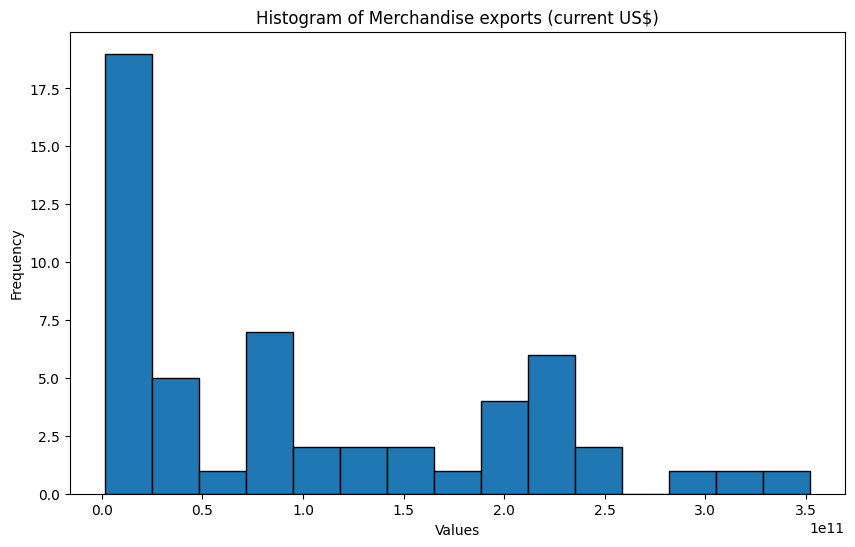

In [25]:
#Check if the columns are normally distributed

#if it is normally distributed, we will use mean for imputation.
#If it is not normally distributed, we will use median for imputation

# Let's use the 'Merchandise exports (current US$)' column (row 3) for the example
column_name = 'Merchandise exports (current US$)'
numeric_data = data_bank.loc[data_bank['Indicator Name'] == column_name].drop('Indicator Name', axis=1).T

# 1. Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(numeric_data, bins=15, edgecolor='black')
plt.title(f"Histogram of {column_name}")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [26]:
#Imputation using median for specific row

# Select the specific row by its index
row_index = 3  # Replace with the actual row index you want to impute

# Extract the row data
row_data = data_bank.iloc[row_index]

# Filter to include only numeric values (exclude non-numeric data)
numeric_row_data = pd.to_numeric(row_data, errors='coerce')

# Calculate the median of the non-missing numeric values
row_median = numeric_row_data.median()

# Fill the missing values (NaNs) in the row with the calculated median
data_bank.iloc[row_index] = row_data.fillna(row_median)

# Display the row after imputation
print("Row after median imputation:")
print(data_bank.iloc[row_index])

Row after median imputation:
Indicator Name    Merchandise exports (current US$)
1970                              1687000000.000000
1971                              1644000000.000000
1972                              1722000000.000000
1973                              3049000000.000000
1974                              4236000000.000000
1975                              3843000000.000000
1976                              5295000000.000000
1977                              6079000000.000000
1978                              7404000000.000000
1979                             11079000000.000000
1980                             12945000000.000000
1981                             11770000000.000000
1982                             12030000000.000000
1983                             14104000000.000000
1984                             16483000000.000000
1985                             15316000000.000000
1986                             13690000000.000000
1987                             17

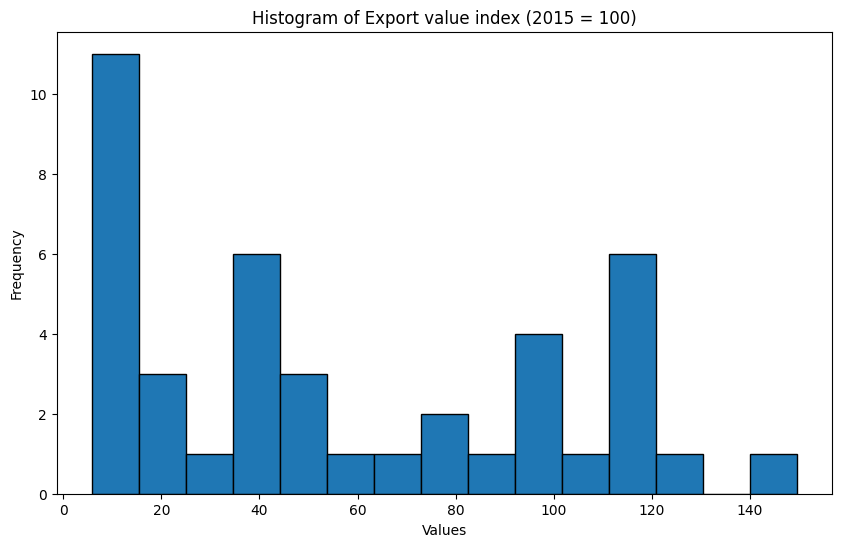

In [27]:
# Let's use the 'Export value index (2015 = 100)' column (row 3) for the example
column_name = 'Export value index (2015 = 100)'
numeric_data = data_bank.loc[data_bank['Indicator Name'] == column_name].drop('Indicator Name', axis=1).T

# 1. Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(numeric_data, bins=15, edgecolor='black')
plt.title(f"Histogram of {column_name}")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [28]:
# Select the specific row by its index
row_index = 0  # Replace with the actual row index you want to impute

# Extract the row data
row_data = data_bank.iloc[row_index]

# Filter to include only numeric values (exclude non-numeric data)
numeric_row_data = pd.to_numeric(row_data, errors='coerce')

# Calculate the median of the non-missing numeric values
row_median = numeric_row_data.median()

# Fill the missing values (NaNs) in the row with the calculated median
data_bank.iloc[row_index] = row_data.fillna(row_median)

# Display the row after imputation
print("Row after median imputation:")
print(data_bank.iloc[row_index])

Row after median imputation:
Indicator Name    Export value index (2015 = 100)
1970                                    45.518518
1971                                    45.518518
1972                                    45.518518
1973                                    45.518518
1974                                    45.518518
1975                                    45.518518
1976                                    45.518518
1977                                    45.518518
1978                                    45.518518
1979                                    45.518518
1980                                     6.473927
1981                                     5.886334
1982                                     6.016666
1983                                     7.053818
1984                                     8.243458
1985                                     7.659766
1986                                     6.846468
1987                                     8.980988
1988                 

***Transposing the dataframe so that the variables will be the columns (for easier handling)***

In [29]:
# Renaming 'Indicator Name' to 'Year' and setting it as the index
before_transpose = data_bank.rename(columns={'Indicator Name': 'Year'}).set_index('Year')

# Display the cleaned dataset head to verify the changes
before_transpose.head()

1970  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.593297   
Merchandise exports to low- and middle-income e...          0.231024   
Merchandise exports (current US$)                  1687000000.000000   
Insurance and financial services (% of commerci...               NaN   

                                                                1971  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.601067   
Merchandise exports to low- and middle-income e...          0.193636   
Merchandise exports (current US$)                  1644000000.000000   
Insurance and financial services (% of commerci...               NaN   

                                                                1972  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.407811   
Merchandise exports to low- and middle-income e...          0.264495   
Merchandise exports (current US$)                  1722000000.000000   
Insurance and financial services (% of commerci...               NaN   

                                                                1973  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.510854   
Merchandise exports to low- and middle-income e...          0.223396   
Merchandise exports (current US$)                  3049000000.000000   
Insurance and financial services (% of commerci...               NaN   

                                                                1974  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.649763   
Merchandise exports to low- and middle-income e...          0.313426   
Merchandise exports (current US$)                  4236000000.000000   
Insurance and financial services (% of commerci...          0.259740   

                                                                1975  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.443054   
Merchandise exports to low- and middle-income e...          0.394410   
Merchandise exports (current US$)                  3843000000.000000   
Insurance and financial services (% of commerci...          0.240964   

                                                                1976  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.490032   
Merchandise exports to low- and middle-income e...          0.629016   
Merchandise exports (current US$)                  5295000000.000000   
Insurance and financial services (% of commerci...          0.233372   

                                                                1977  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.361108   
Merchandise exports to low- and middle-income e...          0.390201   
Merchandise exports (current US$)                  6079000000.000000   
Insurance and financial services (% of commerci...          0.287356   

                        

In [30]:
data_transposed = before_transpose.T

In [31]:
data_transposed

Year  Export value index (2015 = 100)  \
1970                        45.518518   
1971                        45.518518   
1972                        45.518518   
1973                        45.518518   
1974                        45.518518   
1975                        45.518518   
1976                        45.518518   
1977                        45.518518   
1978                        45.518518   
1979                        45.518518   
1980                         6.473927   
1981                         5.886334   
1982                         6.016666   
1983                         7.053818   
1984                         8.243458   
1985                         7.659766   
1986                         6.846468   
1987                         8.980988   
1988                        10.543519   
1989                        12.526702   
1990                        14.729739   
1991                        17.179185   
1992                        20.391168   
1993                        23.571193   
1994                        29.429670   
1995                        36.966424   
1996                        39.172983   
1997                        39.377424   
1998                        36.636704   
1999                        42.320719   
2000                        49.126418   
2001                        43.995372   
2002                        47.041663   
2003                        52.365897   
2004                        63.338109   
2005                        70.829924   
2006                        80.393854   
2007                        88.004148   
2008                        99.731340   
2009                        78.641085   
2010                        99.330078   
2011                       114.070676   
2012                       113.796432   
2013                       114.193065   
2014                       116.992030   
2015                       100.000000   
2016                        94.894407   
2017                       109.091366   
2018                       123.757555   
2019                       119.126469   
2020                       117.091955   
2021                       149.550292   
2022                        45.518518   
2023                        45.518518   

Year  Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)  \
1970                                           0.593297                                                                
1971                                           0.601067                                                                
1972                                           0.407811                                                                
1973                                           0.510854                                                                
1974                                           0.649763                                                                
1975                                           0.443054                                                                
1976                                           0.490032                                                                
1977                                           0.361108                                                                
1978                                           0.263310                                                                
1979                                           0.271012                                                                
1980                                           0.386012                                                                
1981                                           0.773445                                                                
1982                                           0.711265                                                                
1983                                           0.556744         

In [32]:
#Applying median technique of imputation on all rows(columns) as all of the variables are not normally distributed


# Perform median imputation along the correct axis (axis=1 for row-wise after transpose, or axis=0 for column-wise)
numeric_transposed_data = data_transposed.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN

# Impute missing values with the median of each column
imputed_transposed_data = numeric_transposed_data.apply(lambda x: x.fillna(x.median()), axis=1)

# Transpose back to the original structure if necessary
final_imputed_data = imputed_transposed_data.T


In [33]:
# Display final result
final_imputed_data.head()

1970  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.593297   
Merchandise exports to low- and middle-income e...          0.231024   
Merchandise exports (current US$)                  1687000000.000000   
Insurance and financial services (% of commerci...         52.618779   

                                                                1971  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.601067   
Merchandise exports to low- and middle-income e...          0.193636   
Merchandise exports (current US$)                  1644000000.000000   
Insurance and financial services (% of commerci...         44.939271   

                                                                1972  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.407811   
Merchandise exports to low- and middle-income e...          0.264495   
Merchandise exports (current US$)                  1722000000.000000   
Insurance and financial services (% of commerci...         43.816411   

                                                                1973  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.510854   
Merchandise exports to low- and middle-income e...          0.223396   
Merchandise exports (current US$)                  3049000000.000000   
Insurance and financial services (% of commerci...         50.976369   

                                                                1974  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.649763   
Merchandise exports to low- and middle-income e...          0.313426   
Merchandise exports (current US$)                  4236000000.000000   
Insurance and financial services (% of commerci...          0.259740   

                                                                1975  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.443054   
Merchandise exports to low- and middle-income e...          0.394410   
Merchandise exports (current US$)                  3843000000.000000   
Insurance and financial services (% of commerci...          0.240964   

                                                                1976  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.490032   
Merchandise exports to low- and middle-income e...          0.629016   
Merchandise exports (current US$)                  5295000000.000000   
Insurance and financial services (% of commerci...          0.233372   

                                                                1977  \
Year                                                                   
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.361108   
Merchandise exports to low- and middle-income e...          0.390201   
Merchandise exports (current US$)                  6079000000.000000   
Insurance and financial services (% of commerci...          0.287356   

                        

In [34]:
final_imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, Export value index (2015 = 100) to Fertilizer consumption (kilograms per hectare of arable land)
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1970    502 non-null    float64
 1   1971    502 non-null    float64
 2   1972    502 non-null    float64
 3   1973    502 non-null    float64
 4   1974    502 non-null    float64
 5   1975    502 non-null    float64
 6   1976    502 non-null    float64
 7   1977    502 non-null    float64
 8   1978    502 non-null    float64
 9   1979    502 non-null    float64
 10  1980    502 non-null    float64
 11  1981    502 non-null    float64
 12  1982    502 non-null    float64
 13  1983    502 non-null    float64
 14  1984    502 non-null    float64
 15  1985    502 non-null    float64
 16  1986    502 non-null    float64
 17  1987    502 non-null    float64
 18  1988    502 non-null    float64
 19  1989    502 non-null    float6

In [35]:
final_imputed_data = final_imputed_data.rename_axis('Indicator Name')

In [36]:
final_imputed_data

1970  \
Indicator Name                                                         
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.593297   
Merchandise exports to low- and middle-income e...          0.231024   
Merchandise exports (current US$)                  1687000000.000000   
Insurance and financial services (% of commerci...         52.618779   
...                                                              ...   
Communications, computer, etc. (% of service im...         52.618779   
Livestock production index (2014-2016 = 100)                8.950000   
Average precipitation in depth (mm per year)             2875.000000   
Arable land (hectares per person)                           0.092273   
Fertilizer consumption (kilograms per hectare o...        202.913744   

                                                                1971  \
Indicator Name                                                         
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.601067   
Merchandise exports to low- and middle-income e...          0.193636   
Merchandise exports (current US$)                  1644000000.000000   
Insurance and financial services (% of commerci...         44.939271   
...                                                              ...   
Communications, computer, etc. (% of service im...         44.939271   
Livestock production index (2014-2016 = 100)                9.600000   
Average precipitation in depth (mm per year)             2875.000000   
Arable land (hectares per person)                           0.091710   
Fertilizer consumption (kilograms per hectare o...        176.959640   

                                                                1972  \
Indicator Name                                                         
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.407811   
Merchandise exports to low- and middle-income e...          0.264495   
Merchandise exports (current US$)                  1722000000.000000   
Insurance and financial services (% of commerci...         43.816411   
...                                                              ...   
Communications, computer, etc. (% of service im...         43.816411   
Livestock production index (2014-2016 = 100)               10.080000   
Average precipitation in depth (mm per year)             2875.000000   
Arable land (hectares per person)                           0.093230   
Fertilizer consumption (kilograms per hectare o...        212.323367   

                                                                1973  \
Indicator Name                                                         
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.510854   
Merchandise exports to low- and middle-income e...          0.223396   
Merchandise exports (current US$)                  3049000000.000000   
Insurance and financial services (% of commerci...         50.976369   
...                                                              ...   
Communications, computer, etc. (% of service im...         50.976369   
Livestock production index (2014-2016 = 100)               10.070000   
Average precipitation in depth (mm per year)             2875.000000   
Arable land (hectares per person)                           0.091831   
Fertilizer consumption (kilograms per hectare o...        263.263739   

                                                                1974  \
Indicator Name                                                         
Export value index (2015 = 100)                            45.518518   
Merchandise exports to low- and middle-income e...          0.649763   
Merchandise exports to low- 

In [37]:
final_transposed = final_imputed_data.T
final_transposed

Indicator Name  Export value index (2015 = 100)  \
1970                                  45.518518   
1971                                  45.518518   
1972                                  45.518518   
1973                                  45.518518   
1974                                  45.518518   
1975                                  45.518518   
1976                                  45.518518   
1977                                  45.518518   
1978                                  45.518518   
1979                                  45.518518   
1980                                   6.473927   
1981                                   5.886334   
1982                                   6.016666   
1983                                   7.053818   
1984                                   8.243458   
1985                                   7.659766   
1986                                   6.846468   
1987                                   8.980988   
1988                                  10.543519   
1989                                  12.526702   
1990                                  14.729739   
1991                                  17.179185   
1992                                  20.391168   
1993                                  23.571193   
1994                                  29.429670   
1995                                  36.966424   
1996                                  39.172983   
1997                                  39.377424   
1998                                  36.636704   
1999                                  42.320719   
2000                                  49.126418   
2001                                  43.995372   
2002                                  47.041663   
2003                                  52.365897   
2004                                  63.338109   
2005                                  70.829924   
2006                                  80.393854   
2007                                  88.004148   
2008                                  99.731340   
2009                                  78.641085   
2010                                  99.330078   
2011                                 114.070676   
2012                                 113.796432   
2013                                 114.193065   
2014                                 116.992030   
2015                                 100.000000   
2016                                  94.894407   
2017                                 109.091366   
2018                                 123.757555   
2019                                 119.126469   
2020                                 117.091955   
2021                                 149.550292   
2022                                  45.518518   
2023                                  45.518518   

Indicator Name  Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)  \
1970                                                     0.593297                                                                
1971                                                     0.601067                                                                
1972                                                     0.407811                                                                
1973                                                     0.510854                                                                
1974                                                     0.649763                                                                
1975                                                     0.443054                                                                
1976                                                     0.490032                                                                
1977                                                     0.361108                                                                
1978                    

In [146]:
final_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1970 to 2023
Columns: 502 entries, Export value index (2015 = 100) to Fertilizer consumption (kilograms per hectare of arable land)
dtypes: float64(502)
memory usage: 214.3+ KB


In [38]:
final_transposed.columns

Index(['Export value index (2015 = 100)',
       'Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)',
       'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)',
       'Merchandise exports (current US$)',
       'Insurance and financial services (% of commercial service exports)',
       'Agricultural raw materials exports (% of merchandise exports)',
       'Net barter terms of trade index (2015 = 100)',
       'Computer, communications and other services (% of commercial service imports)',
       'Merchandise imports by the reporting economy, residual (% of total merchandise imports)',
       'Merchandise imports from low- and middle-income economies in Latin America & the Caribbean (% of total merchandise imports)',
       ...
       'Net errors and omissions (BoP, current US$)',
       'Net financial account (BoP, current US$)',
       'Secondary income, oth

***Filtering Column***

Indicator Name                                      Export value index (2015 = 100)  \
Indicator Name                                                                        
Export value index (2015 = 100)                                            1.000000   
Merchandise exports to low- and middle-income e...                         0.163674   
Merchandise exports to low- and middle-income e...                         0.157986   
Merchandise exports (current US$)                                          0.798721   
Insurance and financial services (% of commerci...                        -0.100309   
...                                                                             ...   
Communications, computer, etc. (% of service im...                         0.145228   
Livestock production index (2014-2016 = 100)                               0.769744   
Average precipitation in depth (mm per year)                              -0.159385   
Arable land (hectares per person)          

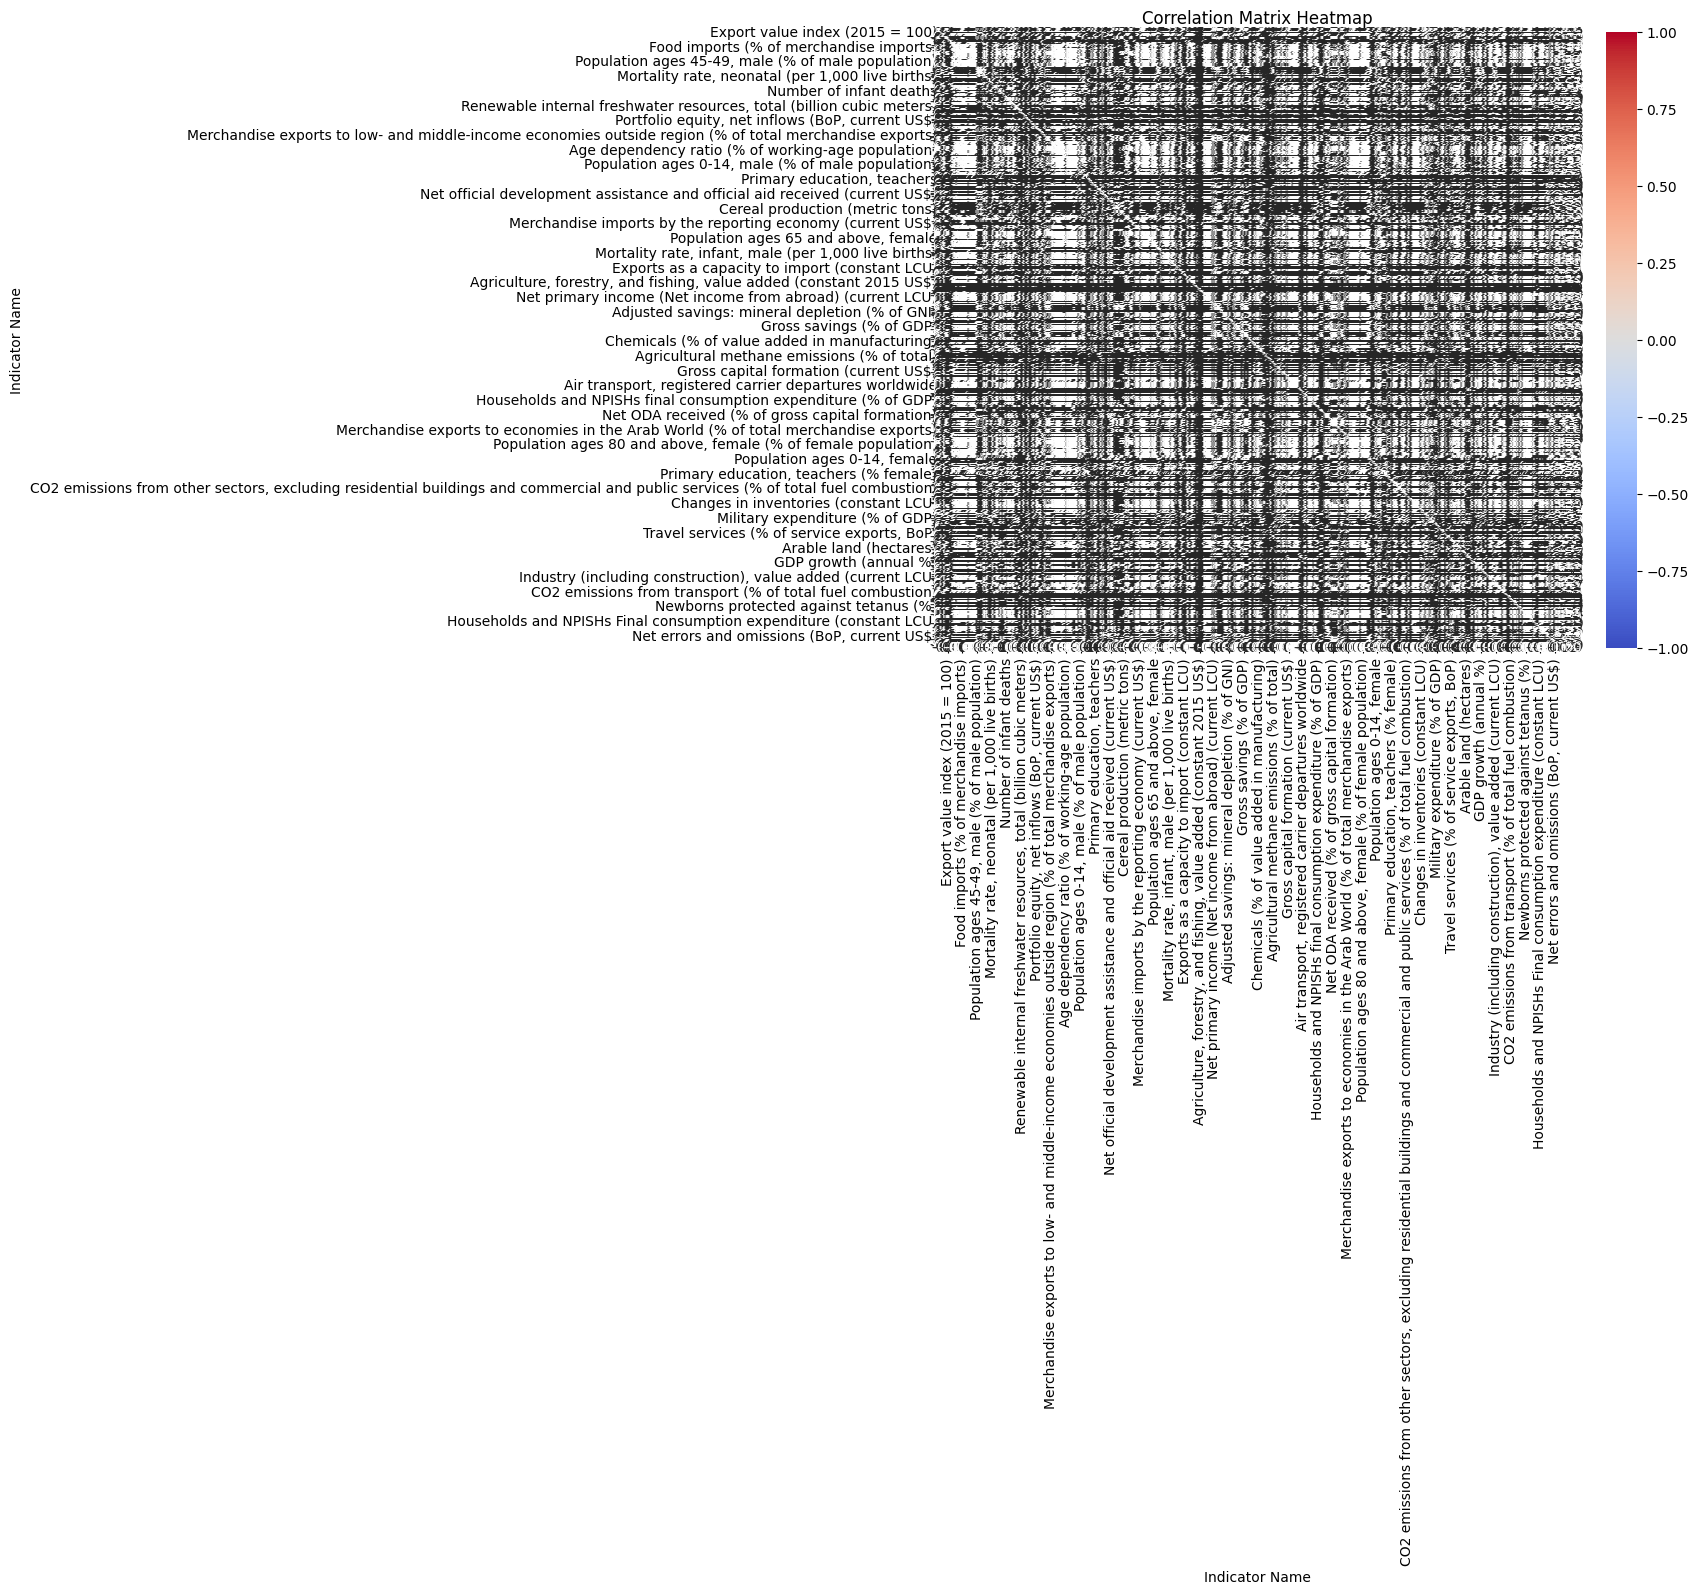

In [39]:
correlation_matrix = final_transposed.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

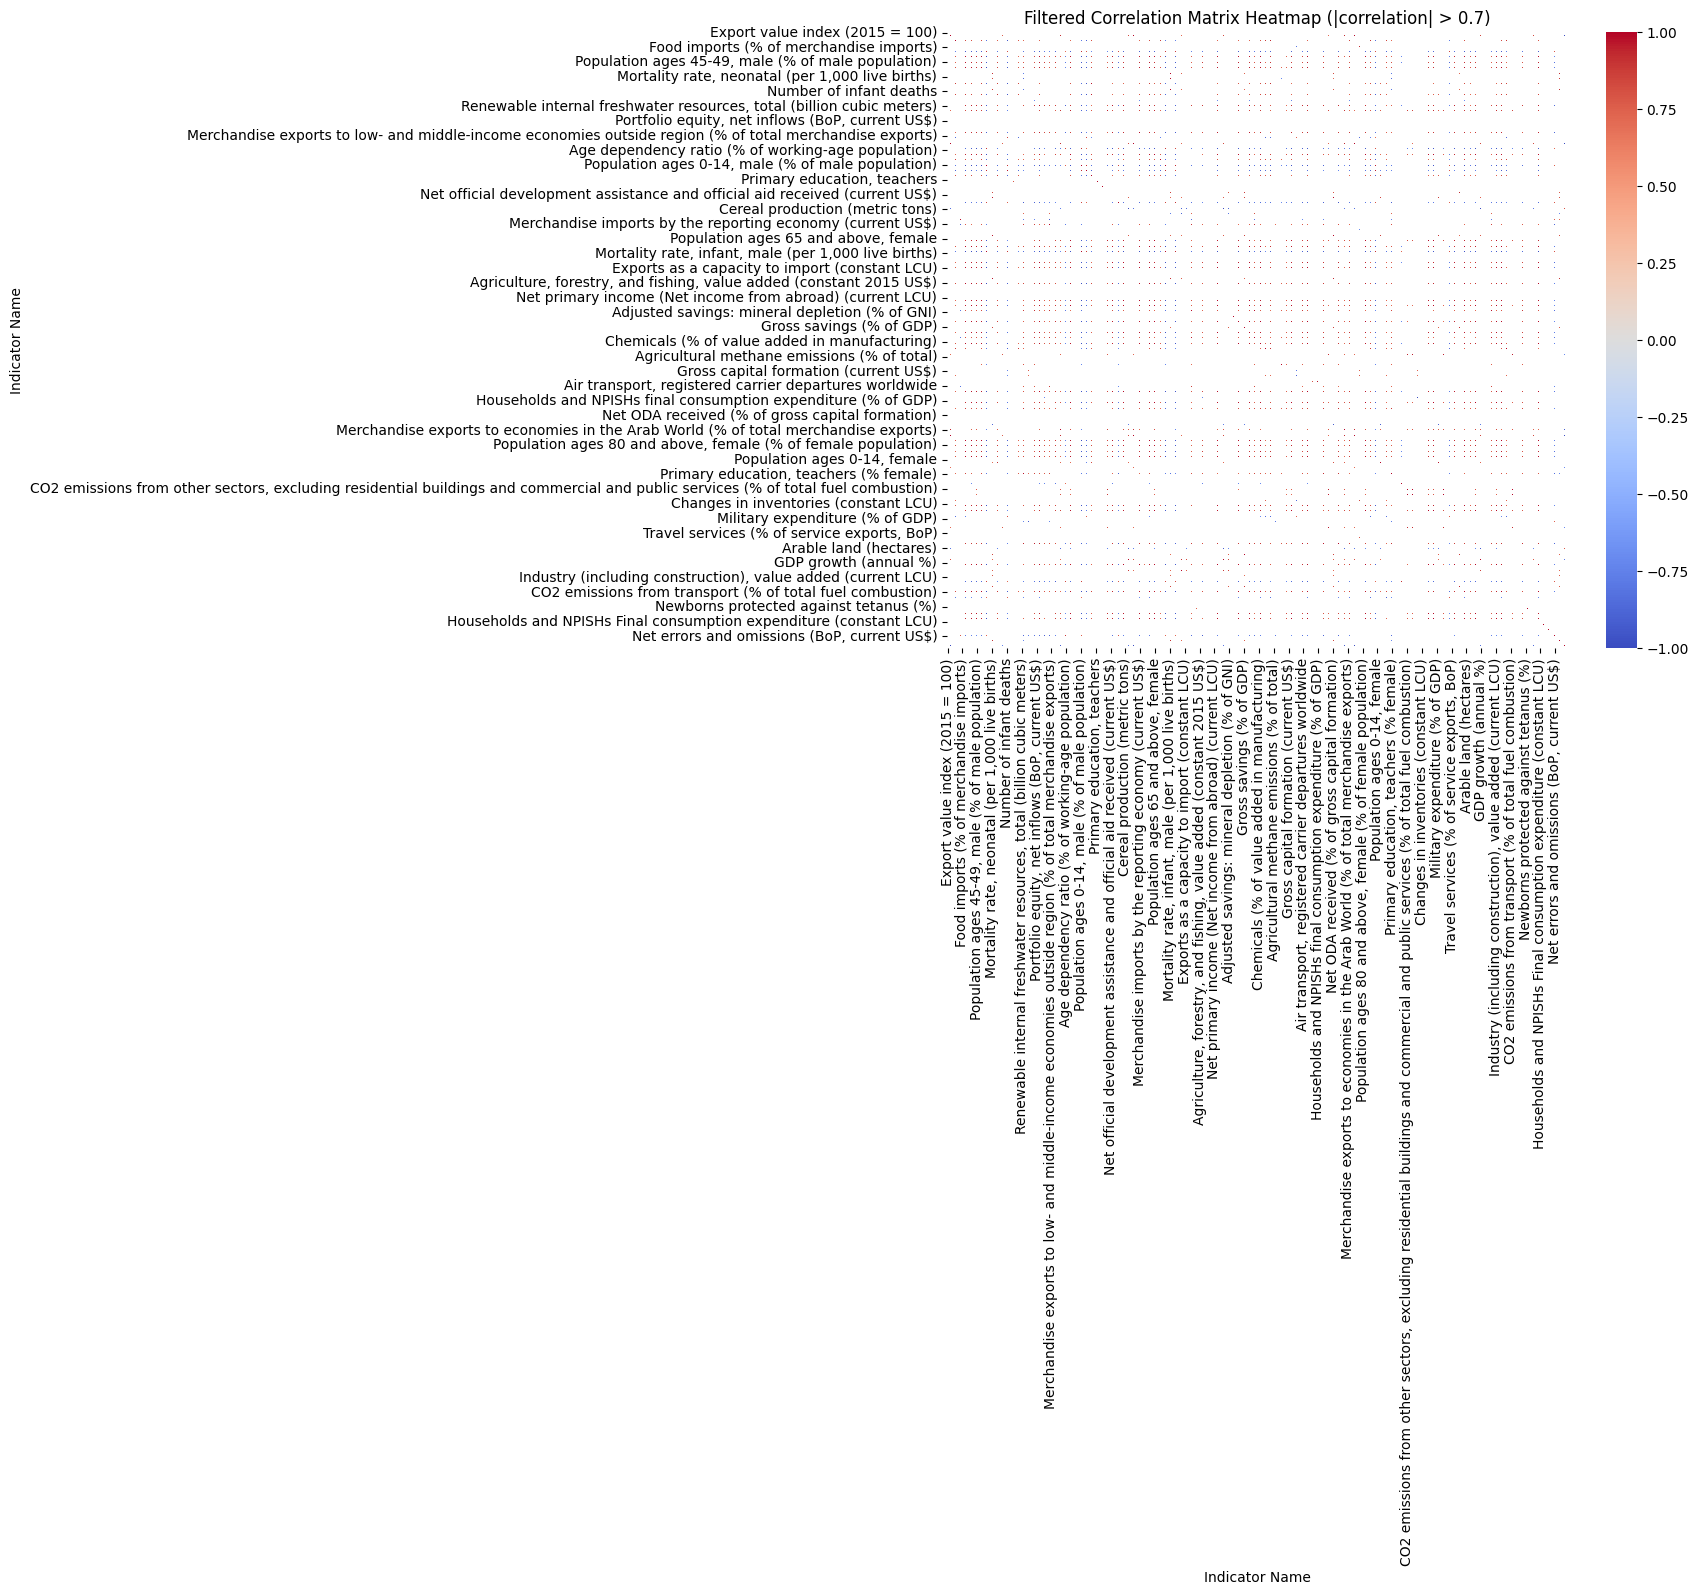

In [40]:
# Compute correlation matrix
correlation_matrix = final_transposed.corr()

# Set a threshold to only show strong correlations
threshold = 0.7
strong_corr = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# Plotting the heatmap for strong correlations
plt.figure(figsize=(10, 8))
sns.heatmap(strong_corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Filtered Correlation Matrix Heatmap (|correlation| > 0.7)')
plt.show()

In [41]:
correlation_unstacked = correlation_matrix.unstack().sort_values(ascending=False, key=lambda x: abs(x))

# Display top 10 correlations (excluding self-correlation)
top_corr = correlation_unstacked[((correlation_unstacked > 0.6) & (correlation_unstacked < 1)) | 
                                 ((correlation_unstacked < -0.6) & (correlation_unstacked > -1))]
print(top_corr)

Indicator Name                                          Indicator Name                                   
Services, value added (constant LCU)                    Services, value added (constant 2015 US$)           1.000000
GDP per capita (constant LCU)                           GDP per capita (constant 2015 US$)                  1.000000
Exports of goods and services (constant LCU)            Exports of goods and services (constant 2015 US$)   1.000000
Services, value added (constant 2015 US$)               Services, value added (constant LCU)                1.000000
Exports of goods and services (constant 2015 US$)       Exports of goods and services (constant LCU)        1.000000
                                                                                                              ...   
Population ages 50-54, female (% of female population)  Secondary education, vocational pupils              0.600018
Import unit value index (2015 = 100)                    Taxes less subsidie

In [42]:
correlation_unstacked = correlation_matrix.unstack().sort_values(ascending=False, key=lambda x: abs(x))

# Display bottom 10 correlations (excluding self-correlation)
bottom_corr = correlation_unstacked[correlation_unstacked < 1].tail(10)
print(bottom_corr)

Indicator Name                                                      Indicator Name                                                    
Fuel exports (% of merchandise exports)                             Services, value added (constant 2015 US$)                            -0.000018
Services, value added (constant 2015 US$)                           Fuel exports (% of merchandise exports)                              -0.000018
Fuel exports (% of merchandise exports)                             Services, value added (constant LCU)                                 -0.000018
Services, value added (constant LCU)                                Fuel exports (% of merchandise exports)                              -0.000018
Population ages 45-49, male (% of male population)                  Insurance and financial services (% of commercial service exports)   -0.000016
Insurance and financial services (% of commercial service exports)  Population ages 45-49, male (% of male population)            

In [43]:
final_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1970 to 2023
Columns: 502 entries, Export value index (2015 = 100) to Fertilizer consumption (kilograms per hectare of arable land)
dtypes: float64(502)
memory usage: 214.3+ KB


In [44]:
#Total number of strongly correlated variable pairs

correlation_matrix = final_transposed.corr()

threshold = 0.8

# Ensure column names are unique by renaming any duplicates
final_transposed.columns = pd.Index([f'col_{i}' if final_transposed.columns.duplicated()[i] else col 
                                     for i, col in enumerate(final_transposed.columns)])

# Find all correlations greater than the threshold or less than the negative threshold
correlation_matrix = final_transposed.corr()
strong_corr = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Stack the correlations to create pairs of variables
strong_corr_pairs = strong_corr.stack().reset_index()

# Rename columns for clarity
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Display the number of strongly correlated variable pairs
print(f'Total number of strongly correlated variable pairs: {len(strong_corr_pairs)}')

# Optionally, display the first few rows of the strong correlations
strong_corr_pairs.head()



Total number of strongly correlated variable pairs: 42528


Variable 1  \
0  Export value index (2015 = 100)   
1  Export value index (2015 = 100)   
2  Export value index (2015 = 100)   
3  Export value index (2015 = 100)   
4  Export value index (2015 = 100)   

                                          Variable 2  Correlation  
0           Population, male (% of total population)     0.858374  
1  Population ages 55-59, male (% of male populat...     0.840766  
2                   Net foreign assets (current LCU)     0.875126  
3            Total reserves minus gold (current US$)     0.862084  
4  Market capitalization of listed domestic compa...     0.841108

In [45]:
strong_corr_pairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42528 entries, 0 to 42527
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Variable 1   42528 non-null  object 
 1   Variable 2   42528 non-null  object 
 2   Correlation  42528 non-null  float64
dtypes: float64(1), object(2)
memory usage: 996.9+ KB


In [46]:
final_imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, Export value index (2015 = 100) to Fertilizer consumption (kilograms per hectare of arable land)
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1970    502 non-null    float64
 1   1971    502 non-null    float64
 2   1972    502 non-null    float64
 3   1973    502 non-null    float64
 4   1974    502 non-null    float64
 5   1975    502 non-null    float64
 6   1976    502 non-null    float64
 7   1977    502 non-null    float64
 8   1978    502 non-null    float64
 9   1979    502 non-null    float64
 10  1980    502 non-null    float64
 11  1981    502 non-null    float64
 12  1982    502 non-null    float64
 13  1983    502 non-null    float64
 14  1984    502 non-null    float64
 15  1985    502 non-null    float64
 16  1986    502 non-null    float64
 17  1987    502 non-null    float64
 18  1988    502 non-null    float64
 19  1989    502 non-null    float6

In [47]:
#Total number of negatively strong correlation pairs

correlation_matrix = final_transposed.corr()

threshold = -0.80  # Set threshold for negatively strong correlations

# Ensure column names are unique by renaming any duplicates
final_transposed.columns = pd.Index([f'col_{i}' if final_transposed.columns.duplicated()[i] else col 
                                     for i, col in enumerate(final_transposed.columns)])

# Compute the correlation matrix
correlation_matrix = final_transposed.corr()

# Find all correlations that are strictly less than the negative threshold
neg_strong_corr = correlation_matrix[(correlation_matrix < threshold) & (correlation_matrix != 1.0)]

# Stack the correlations to create pairs of variables
neg_strong_corr_pairs = neg_strong_corr.stack().reset_index()

# Rename columns for clarity
neg_strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Display the number of negatively strongly correlated variable pairs
print(f'Total number of negatively strong correlation pairs: {len(neg_strong_corr_pairs)}')

# Optionally, display the first few rows of the negatively strong correlations
neg_strong_corr_pairs.head()


Total number of negatively strong correlation pairs: 9890


Variable 1  \
0  Export value index (2015 = 100)   
1  Export value index (2015 = 100)   
2  Export value index (2015 = 100)   
3  Export value index (2015 = 100)   
4  Export value index (2015 = 100)   

                                          Variable 2  Correlation  
0                 Urban population growth (annual %)    -0.801279  
1         Population, female (% of total population)    -0.858374  
2  Population ages 00-04, male (% of male populat...    -0.816904  
3                       Population growth (annual %)    -0.841318  
4  Population ages 00-04, female (% of female pop...    -0.801795

In [48]:
#Dropping the columns that have less than 30% of strong correlation values


# Compute the correlation matrix
correlation_matrix = final_transposed.corr()

# Define the correlation thresholds
positive_threshold = 0.8
negative_threshold = -0.8

# Ensure column names are unique by renaming any duplicates
final_transposed.columns = pd.Index([f'col_{i}' if final_transposed.columns.duplicated()[i] else col 
                                     for i, col in enumerate(final_transposed.columns)])

# Find strong positive and negative correlations
positive_corr = (correlation_matrix > positive_threshold) & (correlation_matrix != 1.0)
negative_corr = (correlation_matrix < negative_threshold)

# Calculate the percentage of strong correlations for each column
total_columns = len(correlation_matrix.columns)
positive_corr_counts = positive_corr.sum()  # Count strong positive correlations
negative_corr_counts = negative_corr.sum()  # Count strong negative correlations

# Combine positive and negative counts
strong_corr_counts = positive_corr_counts + negative_corr_counts

# Calculate percentage of strong correlations
strong_corr_percentages = (strong_corr_counts / (total_columns - 1)) * 100

# Identify columns with less than 30% strong correlations
columns_to_drop = strong_corr_percentages[strong_corr_percentages < 30].index

# Drop the identified columns
final_transposed_reduced = final_transposed.drop(columns=columns_to_drop)

# Display the results
print(f"Columns dropped: {columns_to_drop.tolist()}")
print(f"Remaining columns: {final_transposed_reduced.columns.tolist()}")

# Display the shape of the DataFrame before and after dropping columns
print(f"Original shape: {final_transposed.shape}")
print(f"Reduced shape: {final_transposed_reduced.shape}")


Columns dropped: ['Export value index (2015 = 100)', 'Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)', 'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)', 'Insurance and financial services (% of commercial service exports)', 'Agricultural raw materials exports (% of merchandise exports)', 'Net barter terms of trade index (2015 = 100)', 'Computer, communications and other services (% of commercial service imports)', 'Merchandise imports by the reporting economy, residual (% of total merchandise imports)', 'Merchandise imports from low- and middle-income economies in Latin America & the Caribbean (% of total merchandise imports)', 'Merchandise imports from high-income economies (% of total merchandise imports)', 'Manufactures imports (% of merchandise imports)', 'Food imports (% of merchandise imports)', 'Merchandise trade (% of GDP)', 'Population, male (% of t

In [49]:
final_transposed_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1970 to 2023
Columns: 169 entries, Merchandise exports (current US$) to Livestock production index (2014-2016 = 100)
dtypes: float64(169)
memory usage: 73.8+ KB


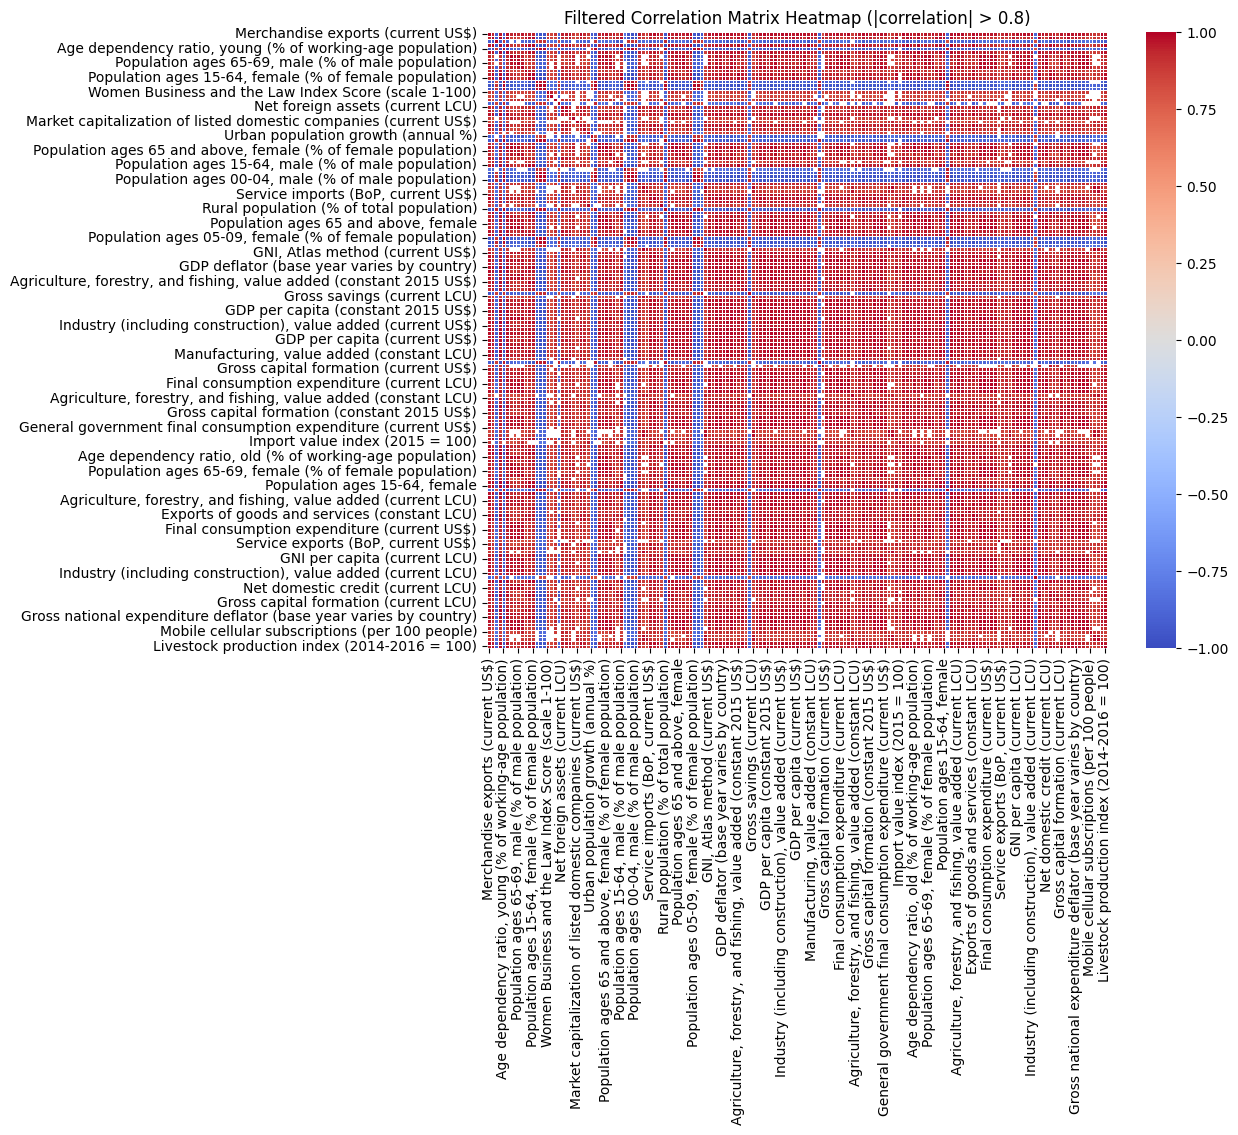

In [50]:
# Compute correlation matrix
correlation_matrix = final_transposed_reduced.corr()

# Set a threshold to only show strong correlations
threshold = 0.8
strong_corr = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# Plotting the heatmap for strong correlations
plt.figure(figsize=(10, 8))
sns.heatmap(strong_corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Filtered Correlation Matrix Heatmap (|correlation| > 0.8)')
plt.show()

In [51]:
bank = final_transposed_reduced

In [52]:
bank.head(5)

Merchandise exports (current US$)  \
1970                  1687000000.000000   
1971                  1644000000.000000   
1972                  1722000000.000000   
1973                  3049000000.000000   
1974                  4236000000.000000   

      Urban population (% of total population)  \
1970                                 33.454000   
1971                                 34.271000   
1972                                 35.104000   
1973                                 35.944000   
1974                                 36.794000   

      Rural population growth (annual %)  Population, total  \
1970                            1.320529    10306508.000000   
1971                            1.123940    10552557.000000   
1972                            1.057367    10801619.000000   
1973                            1.085146    11062664.000000   
1974                            1.097745    11335187.000000   

      Age dependency ratio, young (% of working-age population)  \
1970                                          84.527354           
1971                                          82.874115           
1972                                          81.168440           
1973                                          79.459100           
1974                                          77.772222           

      Population ages 80 and above, male (% of male population)  \
1970                                           0.229222           
1971                                           0.224365           
1972                                           0.218574           
1973                                           0.213788           
1974                                           0.213453           

      Population ages 70-74, male (% of male population)  \
1970                                           0.763932    
1971                                           0.780497    
1972                                           0.787923    
1973                                           0.792225    
1974                                           0.806127    

      Population ages 65 and above, male (% of male population)  \
1970                                           2.605984           
1971                                           2.678020           
1972                                           2.767150           
1973                                           2.860943           
1974                                           2.946045           

      Population ages 65-69, male (% of male population)  \
1970                                           1.280231    
1971                                           1.327319    
1972                                           1.392039    
1973                                           1.459672    
1974                                           1.508327    

      Population ages 55-59, male (% of male population)  ...  \
1970                                           2.549120   ...   
1971                                           2.528412   ...   
1972                                           2.530173   ...   
1973                                           2.541995   ...   
1974                                           2.543481   ...   

      Gross national expenditure (constant LCU)  \
1970                         71980751239.000000   
1971                         70903742678.699997   
1972                         74244135859.500000   
1973                         87866872228.399994   
1974                        107876852474.000000   

      Gross national expenditure deflator (base year varies by country)  \
1970                                          15.737541                   
1971                                          18.008922                   
1972                                          19.411634                   
1973                                          20.107692                   
1974                                          21.138919        

In [53]:
bank.tail()

Merchandise exports (current US$)  \
2019                238195000000.000000   
2020                234766000000.000000   
2021                299425000000.000000   
2022                352094000000.000000   
2023                312846000000.000000   

      Urban population (% of total population)  \
2019                                 76.607000   
2020                                 77.160000   
2021                                 77.696000   
2022                                 78.214000   
2023                                 78.716000   

      Rural population growth (annual %)  Population, total  \
2019                           -1.170074    32804020.000000   
2020                           -1.192485    33199993.000000   
2021                           -1.254874    33573874.000000   
2022                           -1.270483    33938221.000000   
2023                           -1.246001    34308525.000000   

      Age dependency ratio, young (% of working-age population)  \
2019                                          33.926776           
2020                                          33.390750           
2021                                          32.901947           
2022                                          32.471154           
2023                                          32.119193           

      Population ages 80 and above, male (% of male population)  \
2019                                           0.857290           
2020                                           0.893589           
2021                                           0.923279           
2022                                           0.954501           
2023                                           0.996304           

      Population ages 70-74, male (% of male population)  \
2019                                           1.740664    
2020                                           1.804597    
2021                                           1.865974    
2022                                           1.934060    
2023                                           2.013267    

      Population ages 65 and above, male (% of male population)  \
2019                                           6.282547           
2020                                           6.509860           
2021                                           6.722721           
2022                                           6.947859           
2023                                           7.205273           

      Population ages 65-69, male (% of male population)  \
2019                                           2.627077    
2020                                           2.712933    
2021                                           2.795381    
2022                                           2.879710    
2023                                           2.967368    

      Population ages 55-59, male (% of male population)  ...  \
2019                                           4.485289   ...   
2020                                           4.539852   ...   
2021                                           4.590430   ...   
2022                                           4.641635   ...   
2023                                           4.692602   ...   

      Gross national expenditure (constant LCU)  \
2019                       1323026495000.000000   
2020                       1259179530000.000000   
2021                       1307065537000.000000   
2022                       1428196360000.000000   
2023                       1493157528000.000000   

      Gross national expenditure deflator (base year varies by country)  \
2019                                         105.732910                   
2020                                         105.478670                   
2021                                         109.935196                   
2022                                         116.351347                   
2023                                         115.971353        

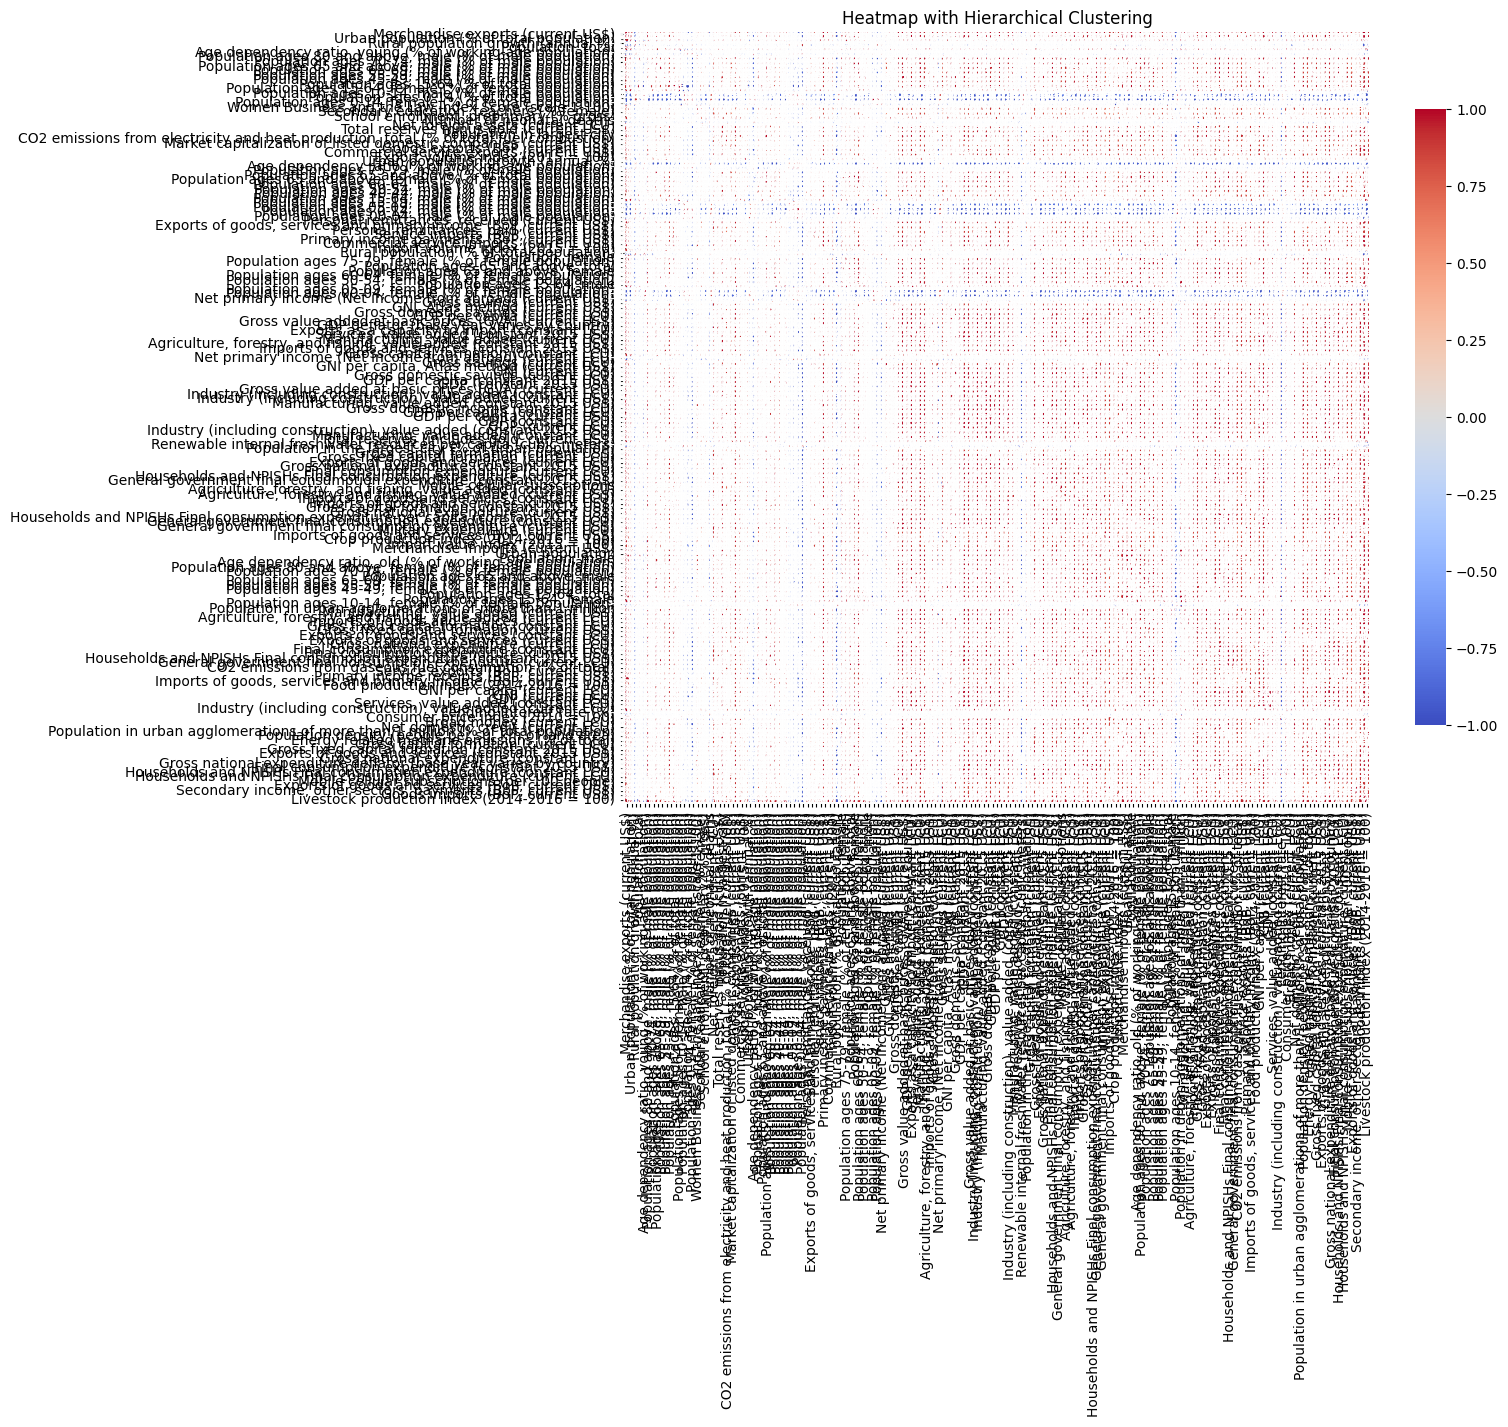

In [54]:
# Perform hierarchical clustering


distance_matrix = 1 - correlation_matrix

linkage_matrix = sch.linkage(distance_matrix, method='ward')  # You can choose different methods like 'single', 'complete'


# Create a figure
plt.figure(figsize=(12, 10))

# Create the heatmap with hierarchical clustering
sns.heatmap(bank.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            xticklabels=bank.columns, yticklabels=bank.columns,
            cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Heatmap with Hierarchical Clustering')
plt.show()

In [55]:
# Check number of columns in your data
num_vars = len(bank.columns)

# Compute the distance matrix
distance_matrix = 1 - bank.corr()

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='ward')

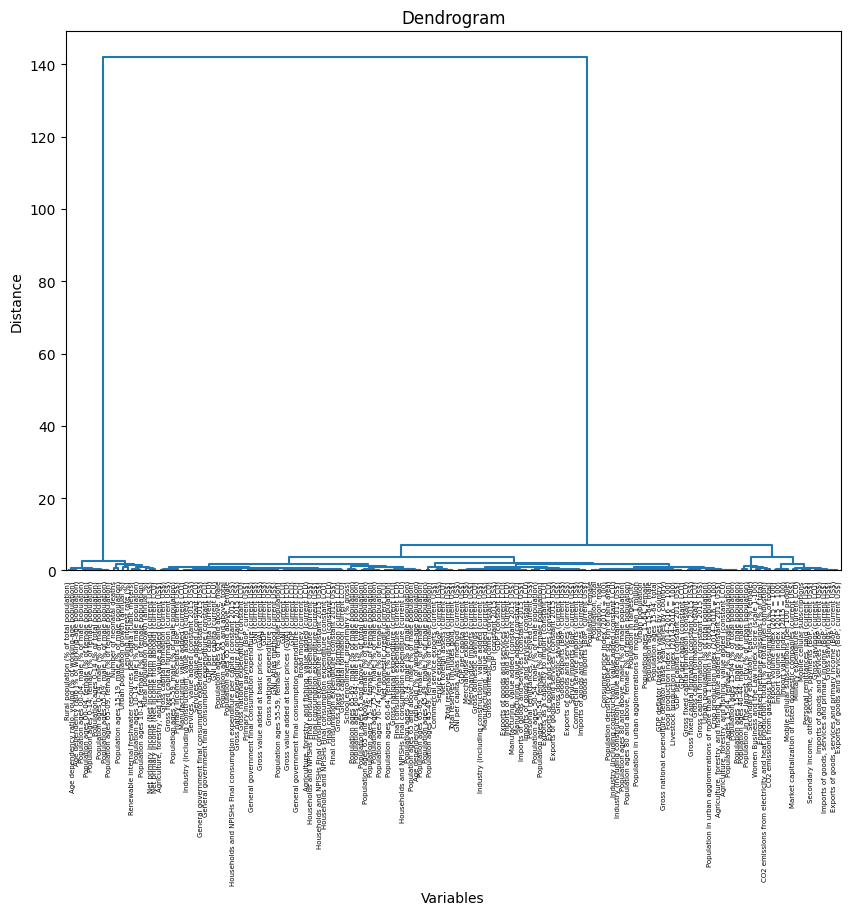

In [56]:
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix, labels=bank.columns, orientation='top', color_threshold=0)
plt.title('Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.show()


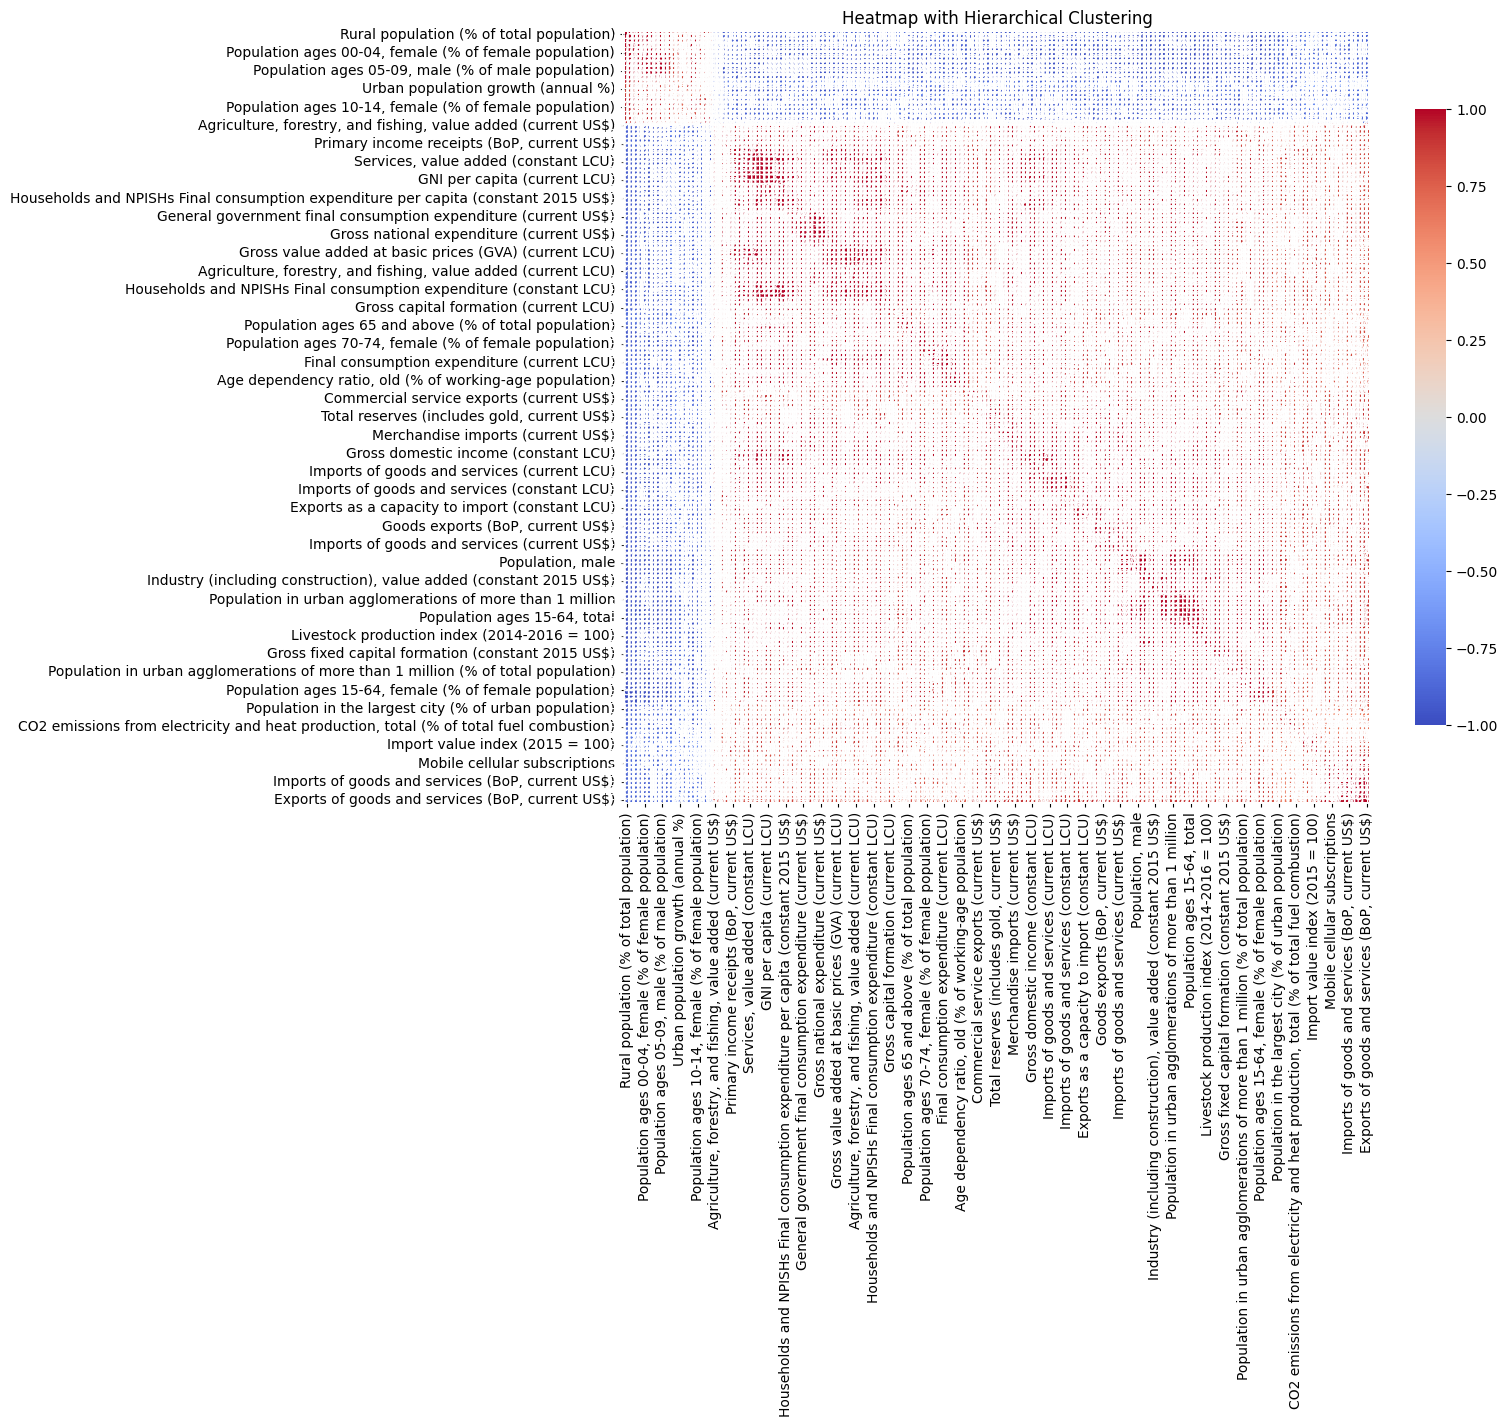

In [57]:
# Reorder columns and rows according to hierarchical clustering
order = leaves_list(linkage_matrix)
ordered_columns = [bank.columns[i] for i in order]

plt.figure(figsize=(12, 10))

# Create heatmap with reordered variables
sns.heatmap(bank[ordered_columns].corr().loc[ordered_columns, ordered_columns], 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            cbar_kws={"shrink": .8})

plt.title('Heatmap with Hierarchical Clustering')
plt.show()

### 4. Feature Engineering

#### 4.1 Feature Selection

In [58]:
#Select relevant columns that satisty the objectives

# List of relevant columns for the analysis based on the objectives
relevant_columns = [
    'Age dependency ratio, young (% of working-age population)',
    'Age dependency ratio, old (% of working-age population)',
    'Gross capital formation (current US$)',
    'Gross domestic savings (current US$)',
    'Urban population growth (annual %)',
    'Rural population growth (annual %)',
    'Lending interest rate (%)',
    'GDP per capita (current US$)',
]

# Create a new DataFrame with only the relevant columns
data_subset = bank[relevant_columns]

# Display the first few rows of the filtered data
data_subset.head()

Age dependency ratio, young (% of working-age population)  \
1970                                          84.527354           
1971                                          82.874115           
1972                                          81.168440           
1973                                          79.459100           
1974                                          77.772222           

      Age dependency ratio, old (% of working-age population)  \
1970                                           4.849506         
1971                                           4.941760         
1972                                           5.075987         
1973                                           5.223730         
1974                                           5.352001         

      Gross capital formation (current US$)  \
1970                       676527658.907233   
1971                       880658921.585972   
1972                      1085631922.189170   
1973                      1811462225.732910   
1974                      2705367154.300230   

      Gross domestic savings (current US$)  \
1970                      840187898.942252   
1971                      941597373.749287   
1972                     1017536094.335420   
1973                     2243249990.791260   
1974                     2727801095.690320   

      Urban population growth (annual %)  Rural population growth (annual %)  \
1970                            4.595063                            1.320529   
1971                            4.772092                            1.123940   
1972                            4.734326                            1.057367   
1973                            4.752699                            1.085146   
1974                            4.770862                            1.097745   

      Lending interest rate (%)  GDP per capita (current US$)  
1970                   9.200000                    374.922881  
1971                   9.190000                    402.214928  
1972                   8.870000                    466.906605  
1973                   9.860000                    692.681499  
1974                  11.230000                    837.763356

In [59]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1970 to 2023
Data columns (total 8 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Age dependency ratio, young (% of working-age population)  54 non-null     float64
 1   Age dependency ratio, old (% of working-age population)    54 non-null     float64
 2   Gross capital formation (current US$)                      54 non-null     float64
 3   Gross domestic savings (current US$)                       54 non-null     float64
 4   Urban population growth (annual %)                         54 non-null     float64
 5   Rural population growth (annual %)                         54 non-null     float64
 6   Lending interest rate (%)                                  54 non-null     float64
 7   GDP per capita (current US$)                               54 non-null     float64
dtypes: float64(8)

#### 4.2 Data Transformation

In [60]:
# Keep the 'Year' as the index
data_subset.index.name = 'Year'

# Normalize only the data columns (excluding the 'Year' index)
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_subset)

# Create a DataFrame with the normalized data, keeping 'Year' as the index
subset_scaled = pd.DataFrame(data_normalized, index=data_subset.index, columns=data_subset.columns)

# Display the normalized data to verify
subset_scaled.head()


Age dependency ratio, young (% of working-age population)  \
Year                                                              
1970                                           1.000000           
1971                                           0.968455           
1972                                           0.935909           
1973                                           0.903293           
1974                                           0.871105           

      Age dependency ratio, old (% of working-age population)  \
Year                                                            
1970                                           0.000000         
1971                                           0.014628         
1972                                           0.035911         
1973                                           0.059337         
1974                                           0.079676         

      Gross capital formation (current US$)  \
Year                                          
1970                               0.000000   
1971                               0.002149   
1972                               0.004306   
1973                               0.011947   
1974                               0.021356   

      Gross domestic savings (current US$)  \
Year                                         
1970                              0.000000   
1971                              0.000816   
1972                              0.001427   
1973                              0.011289   
1974                              0.015187   

      Urban population growth (annual %)  Rural population growth (annual %)  \
Year                                                                           
1970                            0.813193                            0.924611   
1971                            0.863351                            0.854457   
1972                            0.852650                            0.830700   
1973                            0.857856                            0.840614   
1974                            0.863002                            0.845109   

      Lending interest rate (%)  GDP per capita (current US$)  
Year                                                           
1970                   0.631933                      0.000000  
1971                   0.630835                      0.002349  
1972                   0.595703                      0.007917  
1973                   0.704394                      0.027350  
1974                   0.854804                      0.039837

In [61]:
subset_scaled.describe()

Age dependency ratio, young (% of working-age population)  \
count                                          54.000000           
mean                                            0.443722           
std                                             0.285277           
min                                             0.000000           
25%                                             0.185894           
50%                                             0.469569           
75%                                             0.641848           
max                                             1.000000           

       Age dependency ratio, old (% of working-age population)  \
count                                          54.000000         
mean                                            0.331022         
std                                             0.242967         
min                                             0.000000         
25%                                             0.170702         
50%                                             0.255581         
75%                                             0.435413         
max                                             1.000000         

       Gross capital formation (current US$)  \
count                              54.000000   
mean                                0.349220   
std                                 0.318013   
min                                 0.000000   
25%                                 0.083836   
50%                                 0.256419   
75%                                 0.594056   
max                                 1.000000   

       Gross domestic savings (current US$)  \
count                             54.000000   
mean                               0.375696   
std                                0.341109   
min                                0.000000   
25%                                0.066834   
50%                                0.285955   
75%                                0.763372   
max                                1.000000   

       Urban population growth (annual %)  Rural population growth (annual %)  \
count                           54.000000                           54.000000   
mean                             0.615336                            0.503524   
std                              0.312940                            0.354301   
min                              0.000000                            0.000000   
25%                              0.363824                            0.170939   
50%                              0.765159                            0.429157   
75%                              0.857406                            0.856506   
max                              1.000000                            1.000000   

       Lending interest rate (%)  GDP per capita (current US$)  
count                  54.000000                     54.000000  
mean                    0.503147                      0.396810  
std                     0.297494                      0.324425  
min                     0.000000                      0.000000  
25%                     0.186461                      0.135216  
50%                     0.585273                      0.300965  
75%                     0.723126                      0.720505  
max                     1.000000                      1.000000

In [62]:
# Define the categories
population_demographics = [
    'Age dependency ratio, young (% of working-age population)',
    'Age dependency ratio, old (% of working-age population)'
]

economic_indicators = [
    'Gross capital formation (current US$)',
    'Gross domestic savings (current US$)',
    'GDP per capita (current US$)'
]

urban_rural_dynamics = [
    'Urban population growth (annual %)',
    'Rural population growth (annual %)'
]

financial_metrics = [
    'Lending interest rate (%)'
]

In [63]:
# Display Population Demographics variables
print("Population Demographics Variables:")
display(subset_scaled[population_demographics])

# Display Economic Indicators variables
print("Economic Indicators Variables:")
display(subset_scaled[economic_indicators])

# Display Urban and Rural Dynamics variables
print("Urban and Rural Dynamics Variables:")
display(subset_scaled[urban_rural_dynamics])

# Display Financial Metrics variables
print("Financial Metrics Variables:")
display(subset_scaled[financial_metrics])

Population Demographics Variables:


Age dependency ratio, young (% of working-age population)  \
Year                                                              
1970                                           1.000000           
1971                                           0.968455           
1972                                           0.935909           
1973                                           0.903293           
1974                                           0.871105           
1975                                           0.838068           
1976                                           0.804871           
1977                                           0.771301           
1978                                           0.738704           
1979                                           0.710012           
1980                                           0.686063           
1981                                           0.667583           
1982                                           0.654516           
1983                                           0.644297           
1984                                           0.634501           
1985                                           0.623396           
1986                                           0.610530           
1987                                           0.596051           
1988                                           0.579468           
1989                                           0.561921           
1990                                           0.545673           
1991                                           0.532239           
1992                                           0.520940           
1993                                           0.510499           
1994                                           0.500026           
1995                                           0.488963           
1996                                           0.476729           
1997                                           0.462410           
1998                                           0.445769           
1999                                           0.427251           
2000                                           0.412933           
2001                                           0.401297           
2002                                           0.385919           
2003                                           0.366754           
2004                                           0.344227           
2005                                           0.319278           
2006                                           0.292689           
2007                                           0.265271           
2008                                           0.236778           
2009                                           0.207079           
2010                                           0.178832           
2011                                           0.154712           
2012                                           0.134134           
2013                                           0.115701           
2014                                           0.098984           
2015                                           0.083895           
2016                                           0.069776           
2017                                           0.056643           
2018                                           0.045121           
2019                                           0.034490           
2020                                           0.024263           
2021                                           0.014936           
2022                                           0.006716           
2023                                           0.000000           

      Age dependency ratio, old (% of working-age population)  
Year                                                           
1970                                           0.000000        
1971                                           0.014628      

Economic Indicators Variables:


Gross capital formation (current US$)  \
Year                                          
1970                               0.000000   
1971                               0.002149   
1972                               0.004306   
1973                               0.011947   
1974                               0.021356   
1975                               0.015763   
1976                               0.018288   
1977                               0.025861   
1978                               0.038801   
1979                               0.057443   
1980                               0.071296   
1981                               0.084965   
1982                               0.098160   
1983                               0.112896   
1984                               0.112786   
1985                               0.083459   
1986                               0.068740   
1987                               0.071069   
1988                               0.090755   
1989                               0.115028   
1990                               0.142842   
1991                               0.188367   
1992                               0.213122   
1993                               0.268794   
1994                               0.315896   
1995                               0.400362   
1996                               0.433236   
1997                               0.445251   
1998                               0.195517   
1999                               0.179352   
2000                               0.258131   
2001                               0.231169   
2002                               0.255898   
2003                               0.256939   
2004                               0.295554   
2005                               0.331263   
2006                               0.381688   
2007                               0.469816   
2008                               0.514228   
2009                               0.372605   
2010                               0.620666   
2011                               0.720139   
2012                               0.845139   
2013                               0.875494   
2014                               0.881729   
2015                               0.799377   
2016                               0.817226   
2017                               0.851024   
2018                               0.895418   
2019                               0.801967   
2020                               0.691164   
2021                               0.862797   
2022                               1.000000   
2023                               0.940632   

      Gross domestic savings (current US$)  GDP per capita (current US$)  
Year                                                                      
1970                              0.000000                      0.000000  
1971                              0.000816                      0.002349  
1972                              0.001427                      0.007917  
1973                              0.011289                      0.027350  
1974                              0.015187                      0.039837  
1975                              0.011069                      0.036620  
1976                              0.021949                      0.047587  
1977                              0.026387                      0.060286  
1978                              0.035663                      0.079973  
1979                              0.057736                      0.109544  
1980                              0.058108                      0.127217  
1981                              0.051184                      0.126389  
1982                              0.054921                      0.133458  
1983                              0.072859                      0.150482  
1984                              0.090101                      0.166655  
1985                              0.075357                      0.145475  
1986                   

Urban and Rural Dynamics Variables:


Urban population growth (annual %)  Rural population growth (annual %)
Year                                                                        
1970                            0.813193                            0.924611
1971                            0.863351                            0.854457
1972                            0.852650                            0.830700
1973                            0.857856                            0.840614
1974                            0.863002                            0.845109
1975                            0.862486                            0.844906
1976                            0.859918                            0.839872
1977                            0.870873                            0.857189
1978                            0.880957                            0.868116
1979                            0.866756                            0.849222
1980                            0.854716                            0.843985
1981                            0.759113                            0.910304
1982                            0.749325                            0.897163
1983                            0.755065                            0.903064
1984                            0.771205                            0.923018
1985                            0.795237                            0.956687
1986                            0.820250                            0.985294
1987                            0.831206                            1.000000
1988                            0.829945                            0.995887
1989                            0.802939                            0.965980
1990                            0.775117                            0.928760
1991                            0.750821                            0.898306
1992                            0.986150                            0.542744
1993                            1.000000                            0.475322
1994                            0.982790                            0.450519
1995                            0.955241                            0.417405
1996                            0.922083                            0.371891
1997                            0.891864                            0.339308
1998                            0.856054                            0.291550
1999                            0.814407                            0.240041
2000                            0.802520                            0.220773
2001                            0.668219                            0.472431
2002                            0.641705                            0.440909
2003                            0.610375                            0.400893
2004                            0.580296                            0.361530
2005                            0.549406                            0.326651
2006                            0.520201                            0.288373
2007                            0.493660                            0.254252
2008                            0.459179                            0.209373
2009                            0.417733                            0.160071
2010                            0.345855                            0.068489
2011                            0.244850                            0.162785
2012                            0.232022                            0.183727
2013                            0.216648                            0.166677
2014                            0.201528                            0.144305
2015                            0.179950                            0.118994
2016                            0.163881                            0.096725
2017                            0.141151                            0.086971
2018                            0.104354                            0.056375
2019                            0.074995                            0.035831
20

Financial Metrics Variables:


Lending interest rate (%)
Year                           
1970                   0.631933
1971                   0.630835
1972                   0.595703
1973                   0.704394
1974                   0.854804
1975                   0.747211
1976                   0.723058
1977                   0.661576
1978                   0.647303
1979                   0.657184
1980                   0.734037
1981                   0.927265
1982                   0.982708
1983                   0.914639
1984                   0.962397
1985                   1.000000
1986                   0.965508
1987                   0.759562
1988                   0.642912
1989                   0.598539
1990                   0.586462
1991                   0.648127
1992                   0.737513
1993                   0.723149
1994                   0.584083
1995                   0.580332
1996                   0.713543
1997                   0.788748
1998                   0.954072
1999                   0.562034
2000                   0.464322
2001                   0.404304
2002                   0.338614
2003                   0.313637
2004                   0.285641
2005                   0.275394
2006                   0.333948
2007                   0.325531
2008                   0.289392
2009                   0.180060
2010                   0.170820
2011                   0.161488
2012                   0.147307
2013                   0.132372
2014                   0.125480
2015                   0.123103
2016                   0.119336
2017                   0.127791
2018                   0.162963
2019                   0.157304
2020                   0.054906
2021                   0.000000
2022                   0.050933
2023                   0.205664

#### 4.3 Outliers Detection and Treatment

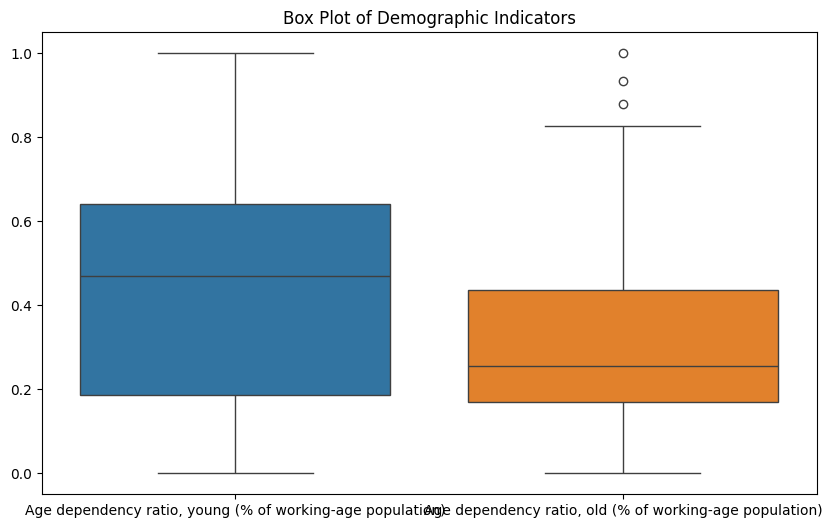

In [64]:
# Box plot for Economic Indicators
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_scaled[population_demographics])
plt.title('Box Plot of Demographic Indicators')
plt.show()

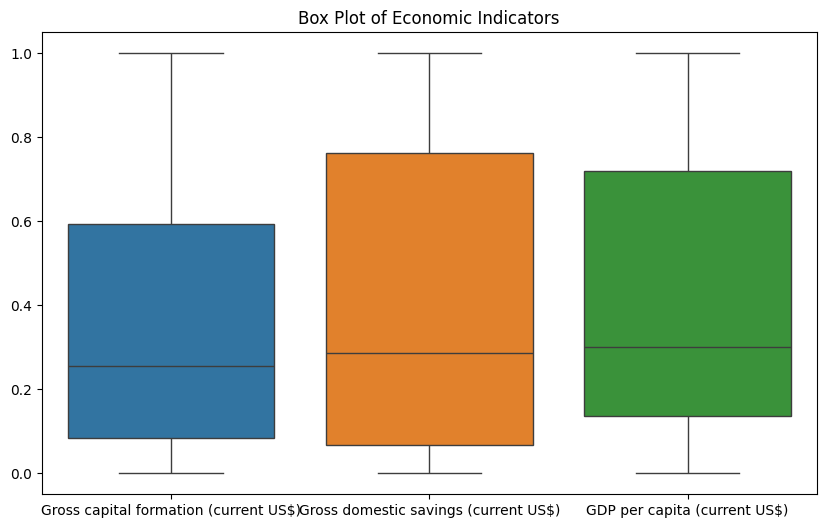

In [65]:
# Box plot for Economic Indicators
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_scaled[economic_indicators])
plt.title('Box Plot of Economic Indicators')
plt.show()

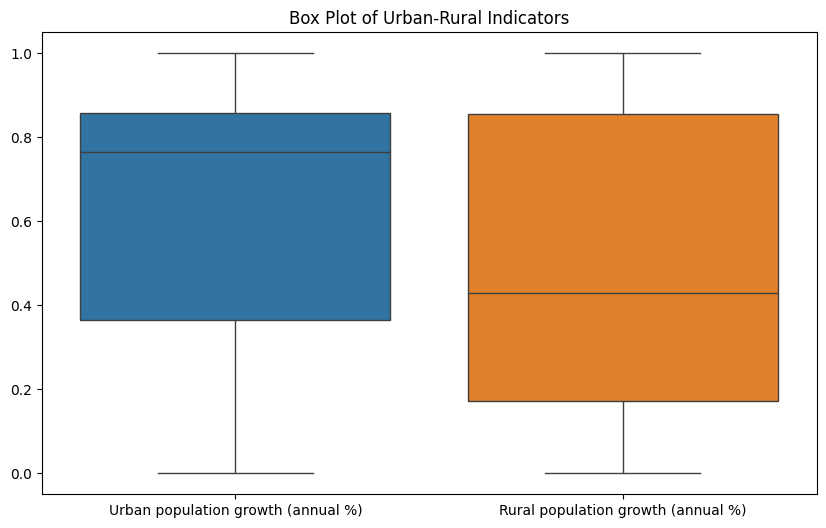

In [66]:
# Box plot for Economic Indicators
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_scaled[urban_rural_dynamics])
plt.title('Box Plot of Urban-Rural Indicators')
plt.show()

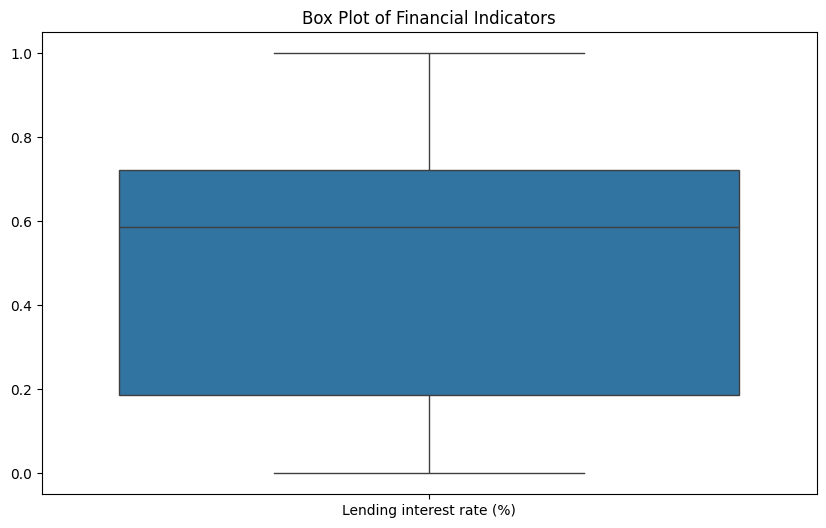

In [67]:
# Box plot for Economic Indicators
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_scaled[financial_metrics])
plt.title('Box Plot of Financial Indicators')
plt.show()

In [68]:
# Calculating the Interquartile Range (IQR) to detect outliers
Q1 = subset_scaled['Age dependency ratio, old (% of working-age population)'].quantile(0.25)
Q3 = subset_scaled['Age dependency ratio, old (% of working-age population)'].quantile(0.75)
IQR = Q3 - Q1

# Defining the bounds for outliers using the 1.5 * IQR rule
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = subset_scaled[(subset_scaled['Age dependency ratio, old (% of working-age population)'] < lower_bound) | 
                         (subset_scaled['Age dependency ratio, old (% of working-age population)'] > upper_bound)]



In [69]:
# Handling the outliers: Capping the outliers to the upper and lower bounds
subset_scaled['Age dependency ratio, old (% of working-age population)'] = subset_scaled['Age dependency ratio, old (% of working-age population)'].clip(lower=lower_bound, upper=upper_bound)



In [70]:
# Display the cleaned data after capping the outliers
print("Cleaned Data After Handling Outliers:")
print(subset_scaled[['Age dependency ratio, old (% of working-age population)']].describe())



Cleaned Data After Handling Outliers:
       Age dependency ratio, old (% of working-age population)
count                                          54.000000      
mean                                            0.325175      
std                                             0.228598      
min                                             0.000000      
25%                                             0.170702      
50%                                             0.255581      
75%                                             0.435413      
max                                             0.832479      


In [71]:
# Display the outliers
print("\nOutliers detected:")
print(outliers)


Outliers detected:
      Age dependency ratio, young (% of working-age population)  \
Year                                                              
2021                                           0.014936           
2022                                           0.006716           
2023                                           0.000000           

      Age dependency ratio, old (% of working-age population)  \
Year                                                            
2021                                           0.878397         
2022                                           0.934765         
2023                                           1.000000         

      Gross capital formation (current US$)  \
Year                                          
2021                               0.862797   
2022                               1.000000   
2023                               0.940632   

      Gross domestic savings (current US$)  \
Year                                

In [72]:
subset_scaled.head()

Age dependency ratio, young (% of working-age population)  \
Year                                                              
1970                                           1.000000           
1971                                           0.968455           
1972                                           0.935909           
1973                                           0.903293           
1974                                           0.871105           

      Age dependency ratio, old (% of working-age population)  \
Year                                                            
1970                                           0.000000         
1971                                           0.014628         
1972                                           0.035911         
1973                                           0.059337         
1974                                           0.079676         

      Gross capital formation (current US$)  \
Year                                          
1970                               0.000000   
1971                               0.002149   
1972                               0.004306   
1973                               0.011947   
1974                               0.021356   

      Gross domestic savings (current US$)  \
Year                                         
1970                              0.000000   
1971                              0.000816   
1972                              0.001427   
1973                              0.011289   
1974                              0.015187   

      Urban population growth (annual %)  Rural population growth (annual %)  \
Year                                                                           
1970                            0.813193                            0.924611   
1971                            0.863351                            0.854457   
1972                            0.852650                            0.830700   
1973                            0.857856                            0.840614   
1974                            0.863002                            0.845109   

      Lending interest rate (%)  GDP per capita (current US$)  
Year                                                           
1970                   0.631933                      0.000000  
1971                   0.630835                      0.002349  
1972                   0.595703                      0.007917  
1973                   0.704394                      0.027350  
1974                   0.854804                      0.039837

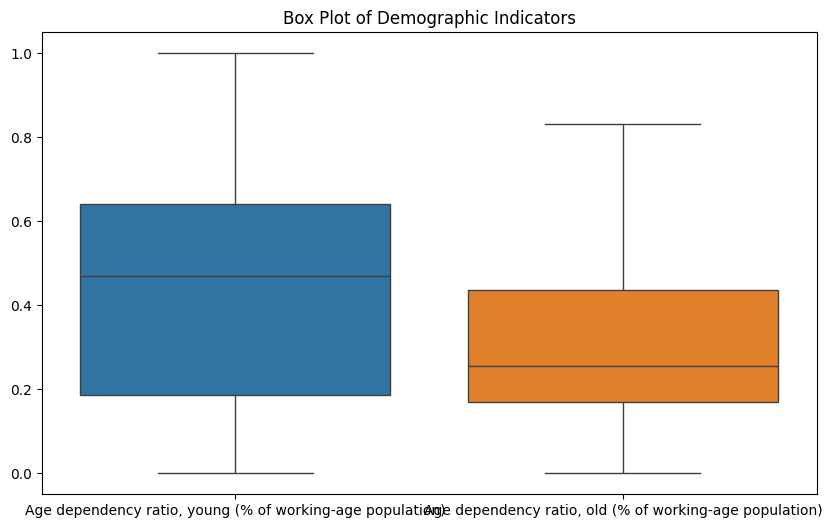

In [73]:
# Box plot for Economic Indicators
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_scaled[population_demographics])
plt.title('Box Plot of Demographic Indicators')
plt.show()

<h3>5. Exploratory Data Analysis (EDA)</h3>

#### 5.1 Descriptive Statistics

In [74]:
subset_scaled.describe()

Age dependency ratio, young (% of working-age population)  \
count                                          54.000000           
mean                                            0.443722           
std                                             0.285277           
min                                             0.000000           
25%                                             0.185894           
50%                                             0.469569           
75%                                             0.641848           
max                                             1.000000           

       Age dependency ratio, old (% of working-age population)  \
count                                          54.000000         
mean                                            0.325175         
std                                             0.228598         
min                                             0.000000         
25%                                             0.170702         
50%                                             0.255581         
75%                                             0.435413         
max                                             0.832479         

       Gross capital formation (current US$)  \
count                              54.000000   
mean                                0.349220   
std                                 0.318013   
min                                 0.000000   
25%                                 0.083836   
50%                                 0.256419   
75%                                 0.594056   
max                                 1.000000   

       Gross domestic savings (current US$)  \
count                             54.000000   
mean                               0.375696   
std                                0.341109   
min                                0.000000   
25%                                0.066834   
50%                                0.285955   
75%                                0.763372   
max                                1.000000   

       Urban population growth (annual %)  Rural population growth (annual %)  \
count                           54.000000                           54.000000   
mean                             0.615336                            0.503524   
std                              0.312940                            0.354301   
min                              0.000000                            0.000000   
25%                              0.363824                            0.170939   
50%                              0.765159                            0.429157   
75%                              0.857406                            0.856506   
max                              1.000000                            1.000000   

       Lending interest rate (%)  GDP per capita (current US$)  
count                  54.000000                     54.000000  
mean                    0.503147                      0.396810  
std                     0.297494                      0.324425  
min                     0.000000                      0.000000  
25%                     0.186461                      0.135216  
50%                     0.585273                      0.300965  
75%                     0.723126                      0.720505  
max                     1.000000                      1.000000

***Visualisation of the trend of every column***

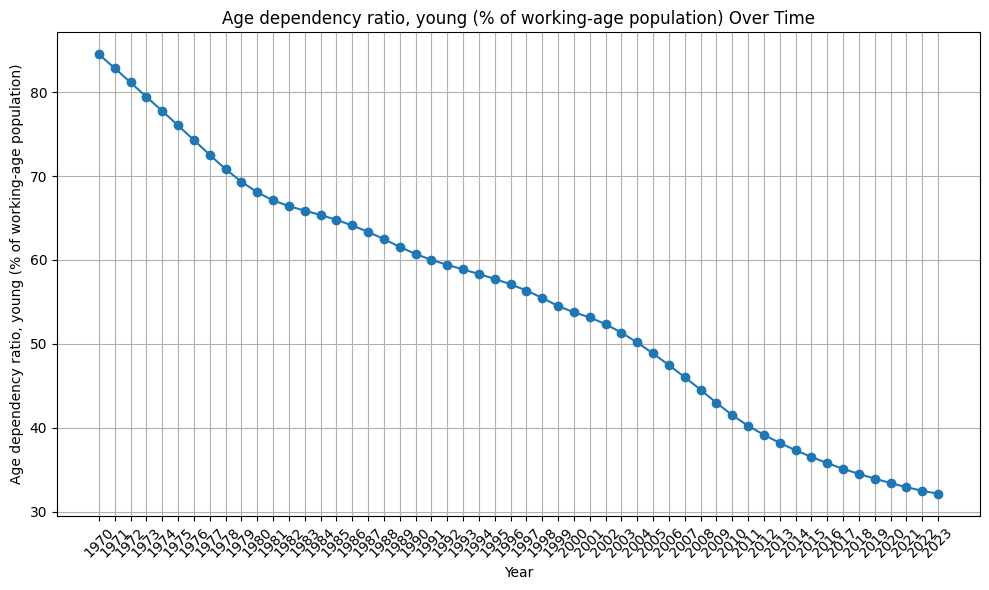

In [112]:
plt.figure(figsize=(10, 6))  
plt.plot(data_subset.index, data_subset['Age dependency ratio, young (% of working-age population)'], marker='o', linestyle='-') 
plt.title(f'{'Age dependency ratio, young (% of working-age population)'} Over Time')  
plt.xlabel('Year')  
plt.ylabel('Age dependency ratio, young (% of working-age population)')  
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

In [113]:
data_subset['Age dependency ratio, young (% of working-age population)'].idxmax()

'1970'

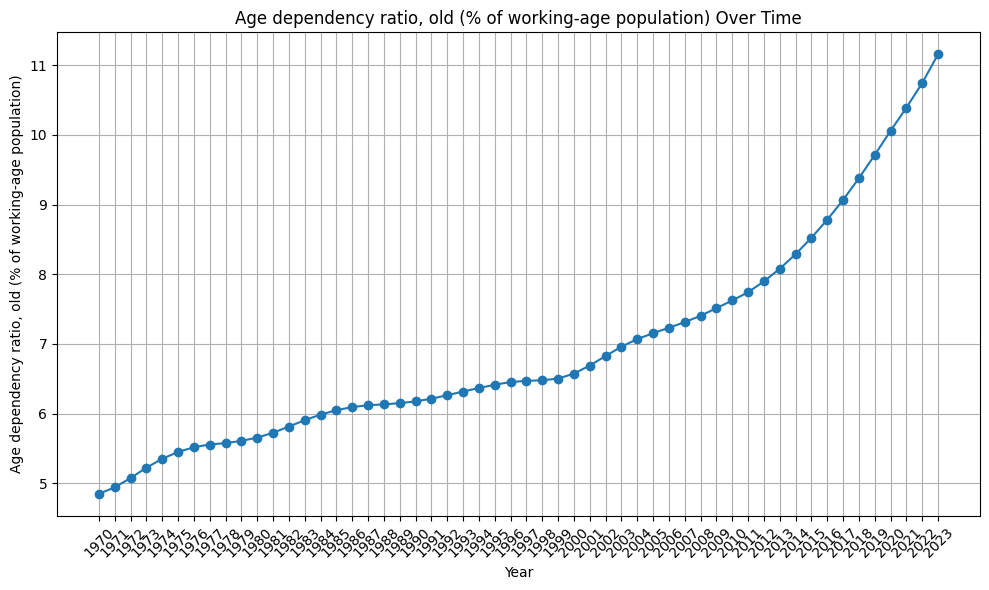

In [114]:
plt.figure(figsize=(10, 6))  
plt.plot(data_subset.index, data_subset['Age dependency ratio, old (% of working-age population)'], marker='o', linestyle='-')  
plt.title(f'{'Age dependency ratio, old (% of working-age population)'} Over Time')  
plt.xlabel('Year') 
plt.ylabel('Age dependency ratio, old (% of working-age population)')  
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

In [115]:
data_subset['Age dependency ratio, old (% of working-age population)'].idxmax()

'2023'

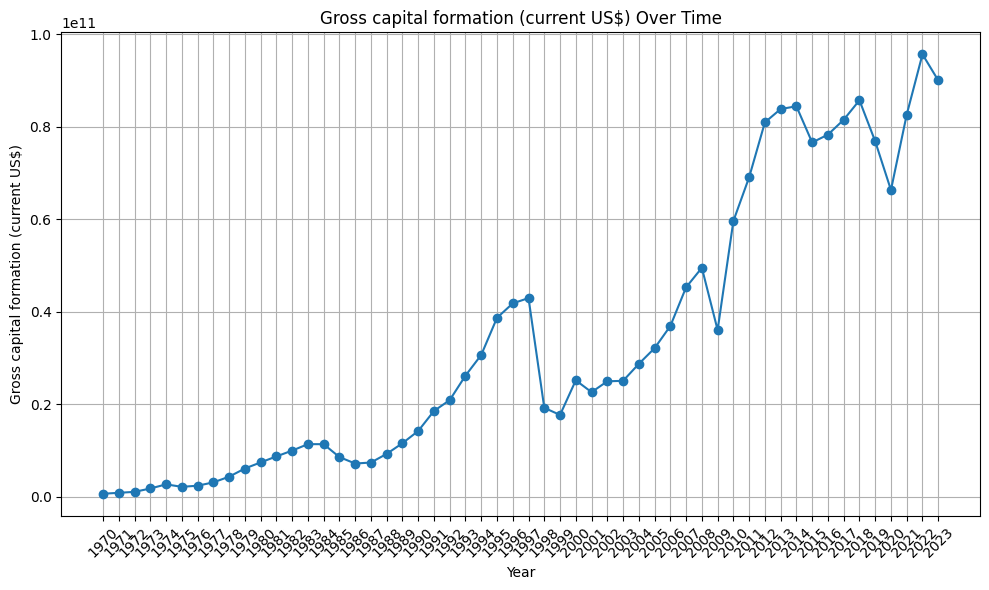

In [116]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_subset.index, data_subset['Gross capital formation (current US$)'], marker='o', linestyle='-')  
plt.title(f'{'Gross capital formation (current US$)'} Over Time')  
plt.xlabel('Year')  
plt.ylabel('Gross capital formation (current US$)') 
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

In [117]:
data_subset['Gross capital formation (current US$)'].idxmax()

'2022'

In [118]:
data_subset['Gross capital formation (current US$)'].idxmin()

'1970'

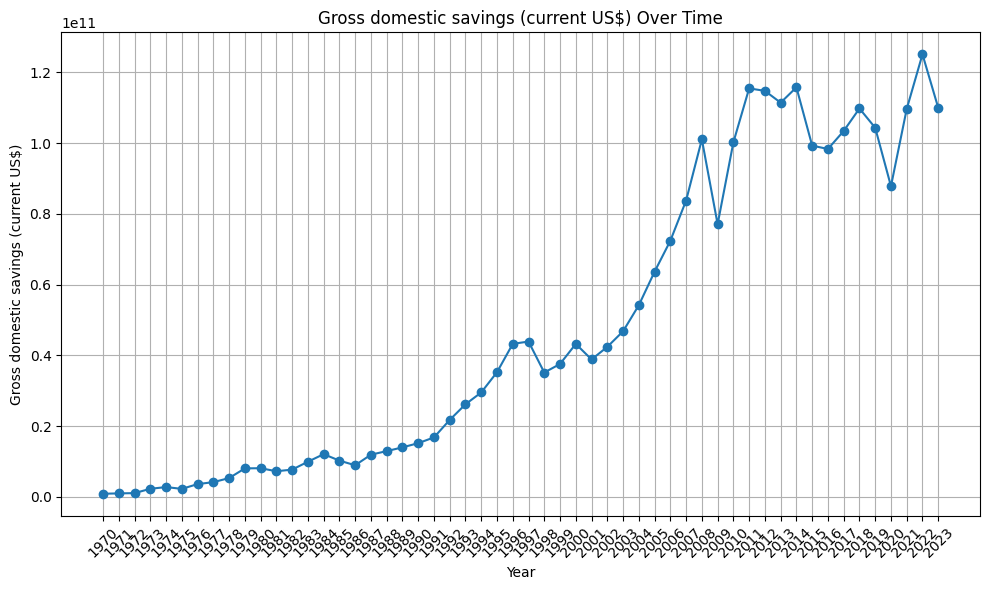

In [119]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_subset.index, data_subset['Gross domestic savings (current US$)'], marker='o', linestyle='-')  
plt.title(f'{'Gross domestic savings (current US$)'} Over Time')  
plt.xlabel('Year')  
plt.ylabel('Gross domestic savings (current US$)')  
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

In [120]:
data_subset['Gross domestic savings (current US$)'].idxmax()

'2022'

In [121]:
data_subset['Gross domestic savings (current US$)'].idxmin()

'1970'

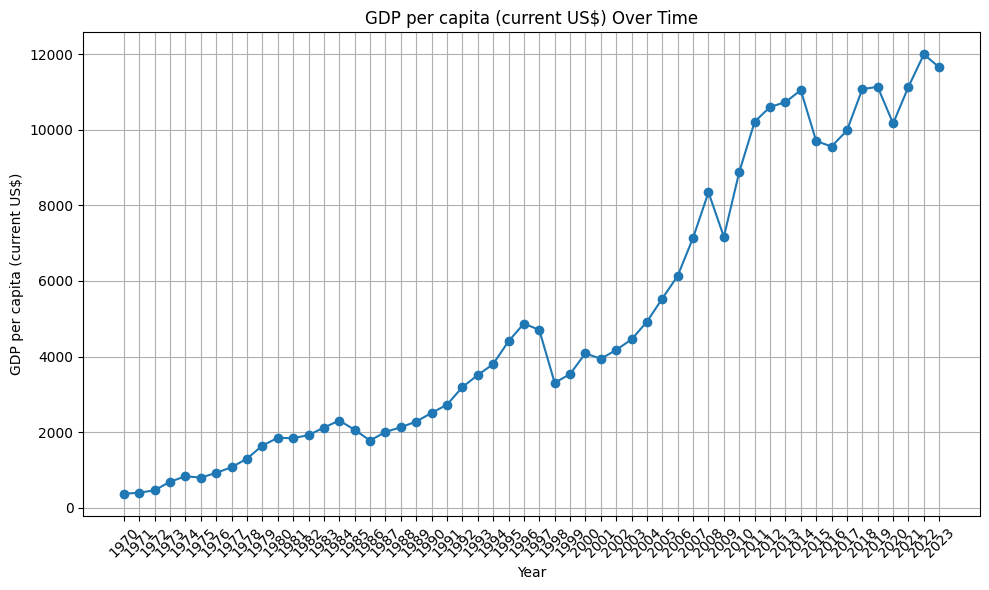

In [122]:
plt.figure(figsize=(10, 6))  
plt.plot(data_subset.index, data_subset['GDP per capita (current US$)'], marker='o', linestyle='-')  
plt.title(f'{'GDP per capita (current US$)'} Over Time')  
plt.xlabel('Year')  
plt.ylabel('GDP per capita (current US$)')  
plt.grid(True) 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()  

In [123]:
data_subset['GDP per capita (current US$)'].idxmax()

'2022'

In [124]:
data_subset['GDP per capita (current US$)'].idxmin()

'1970'

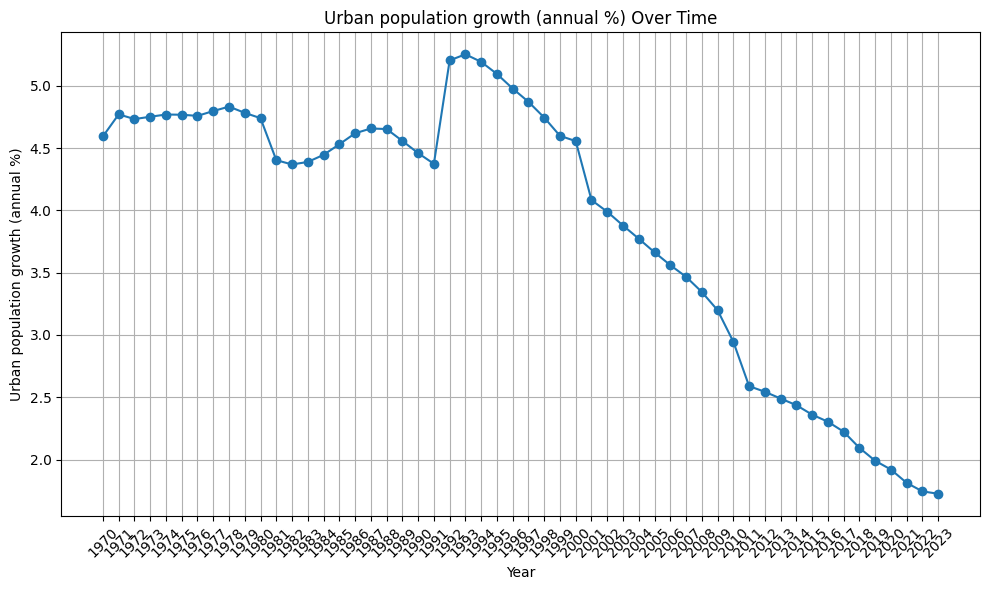

In [125]:
plt.figure(figsize=(10, 6)) 
plt.plot(data_subset.index, data_subset['Urban population growth (annual %)'], marker='o', linestyle='-')  
plt.title(f'{'Urban population growth (annual %)'} Over Time')  
plt.xlabel('Year')  
plt.ylabel('Urban population growth (annual %)')  
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

In [126]:
data_subset['Urban population growth (annual %)'].idxmax()

'1993'

In [127]:
data_subset['Urban population growth (annual %)'].idxmin()

'2023'

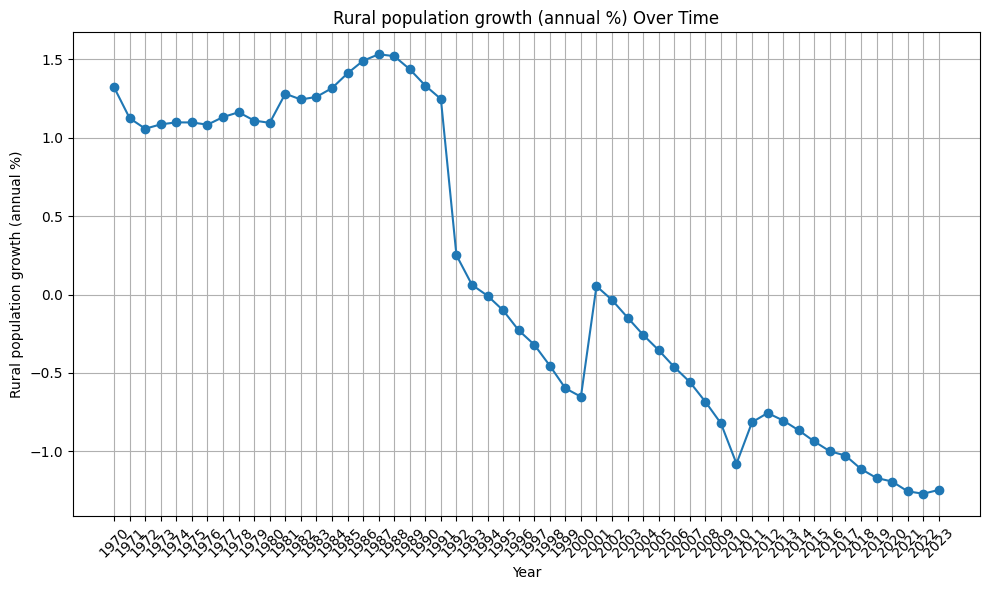

In [128]:
plt.figure(figsize=(10, 6))  
plt.plot(data_subset.index, data_subset['Rural population growth (annual %)'], marker='o', linestyle='-')  
plt.title(f'{'Rural population growth (annual %)'} Over Time')  
plt.xlabel('Year')  
plt.ylabel('Rural population growth (annual %)')  
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show() 

In [129]:
data_subset['Rural population growth (annual %)'].idxmax()

'1987'

In [130]:
data_subset['Rural population growth (annual %)'].idxmin()

'2022'

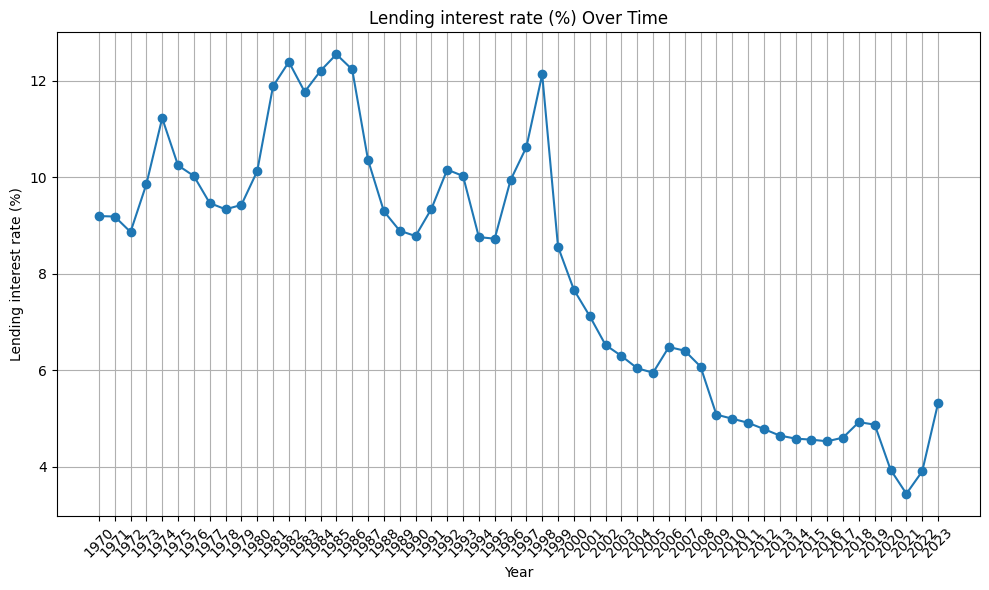

In [131]:
plt.figure(figsize=(10, 6))  
plt.plot(data_subset.index, data_subset['Lending interest rate (%)'], marker='o', linestyle='-')  
plt.title(f'{'Lending interest rate (%)'} Over Time') 
plt.xlabel('Year')  
plt.ylabel('Lending interest rate (%)')  
plt.grid(True)  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

In [132]:
data_subset['Lending interest rate (%)'].idxmax()

'1985'

In [133]:
data_subset['Lending interest rate (%)'].idxmin()

'2021'

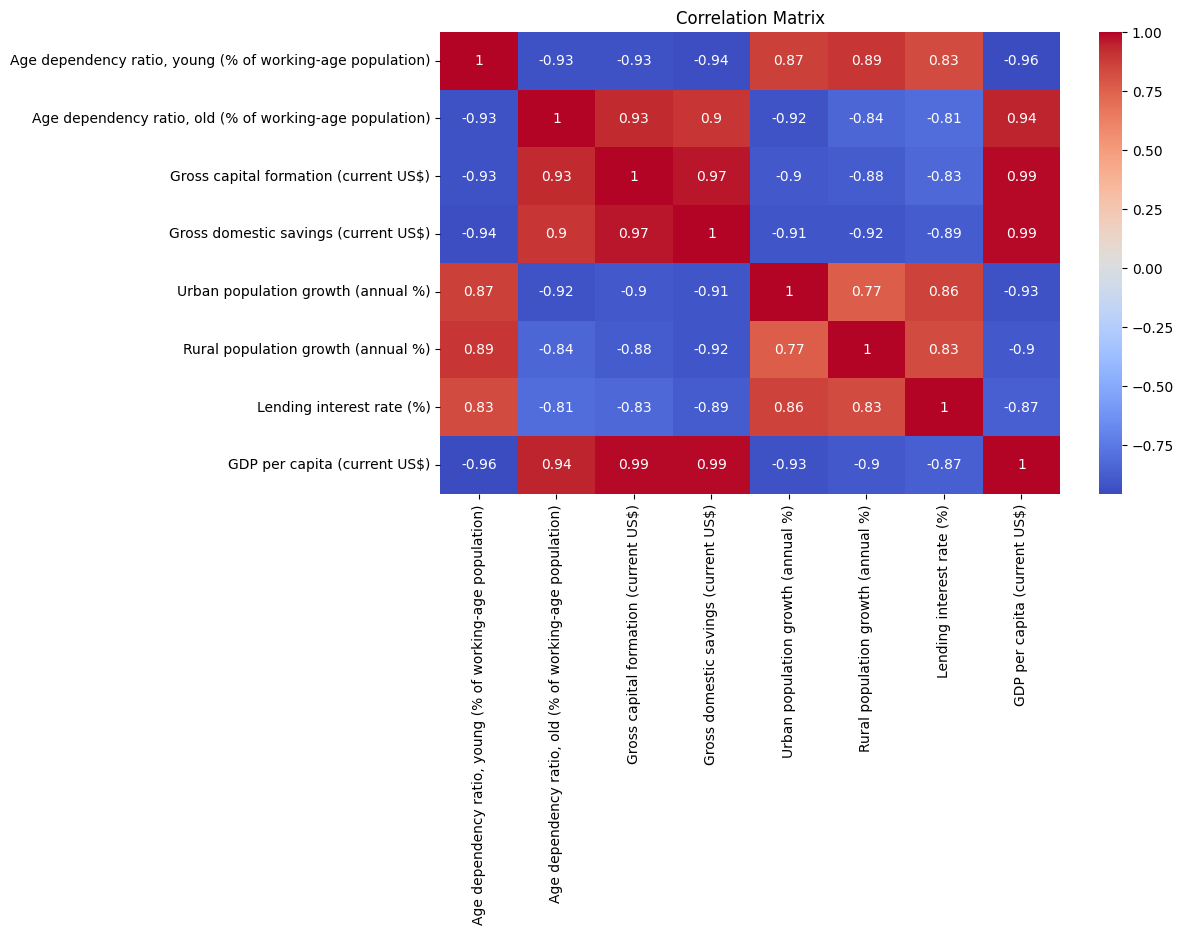

In [145]:
# Compute correlation matrix
correlation_matrix = data_subset.corr()

# Plot heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [98]:
# Define thresholds for weak, moderate, and strong correlations
weak_threshold = 0.3
moderate_threshold = 0.6
strong_threshold = 0.8

# Create an empty dictionary to store results
correlations = {
    'Weak Correlations': [],
    'Moderate Correlations': [],
    'Strong Correlations': [],
    'Very Strong Correlations': []
}

# Iterate through the correlation matrix and categorize correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) < weak_threshold:
            correlations['Weak Correlations'].append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))
        elif abs(corr_value) < moderate_threshold:
            correlations['Moderate Correlations'].append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))
        elif abs(corr_value) < strong_threshold:
            correlations['Strong Correlations'].append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))
        else:
            correlations['Very Strong Correlations'].append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

# Display categorized correlations
for category, values in correlations.items():
    print(f"\n{category}:")
    for var1, var2, corr_value in values:
        print(f"{var1} - {var2}: {corr_value:.2f}")


Weak Correlations:

Moderate Correlations:

Strong Correlations:
Urban population growth (annual %) - Rural population growth (annual %): 0.77

Very Strong Correlations:
Age dependency ratio, young (% of working-age population) - Age dependency ratio, old (% of working-age population): -0.94
Age dependency ratio, young (% of working-age population) - Gross capital formation (current US$): -0.93
Age dependency ratio, young (% of working-age population) - Gross domestic savings (current US$): -0.94
Age dependency ratio, young (% of working-age population) - Urban population growth (annual %): 0.87
Age dependency ratio, young (% of working-age population) - Rural population growth (annual %): 0.89
Age dependency ratio, young (% of working-age population) - Lending interest rate (%): 0.83
Age dependency ratio, young (% of working-age population) - GDP per capita (current US$): -0.96
Age dependency ratio, old (% of working-age population) - Gross capital formation (current US$): 0.93
Age d

#### 5.2 Feature Analysis and Visualization

***Objective 1 : Investigating How Age Dependency Ratios Affect Gross Capital Formation and Domestic Savings***

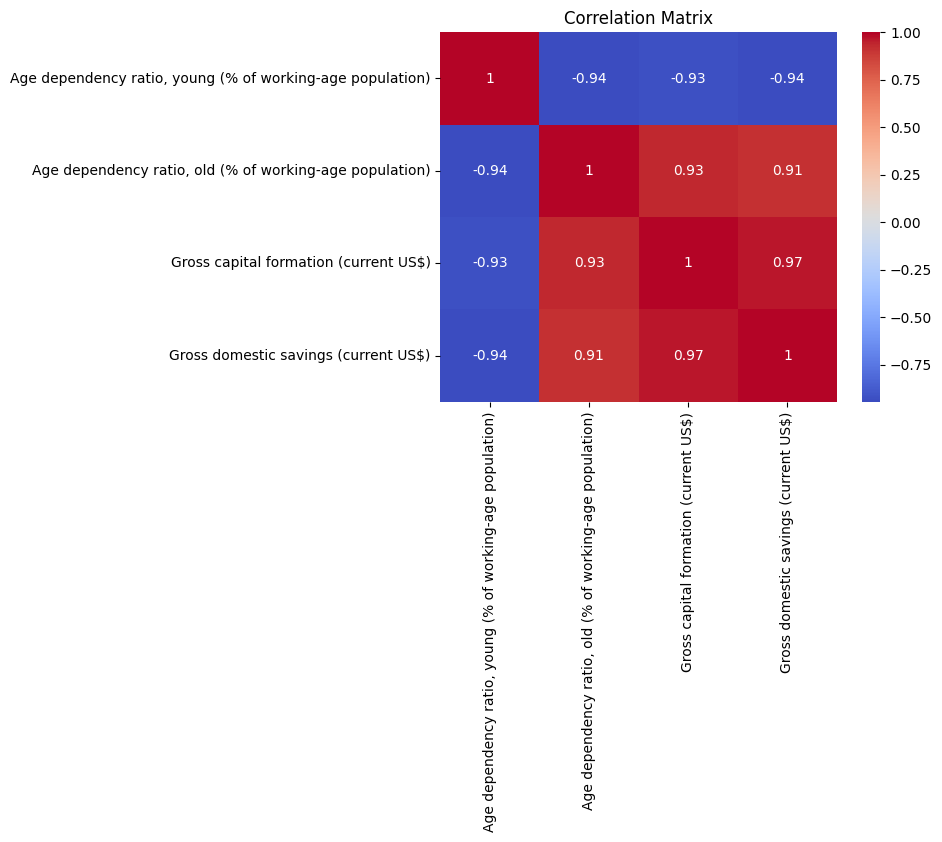

In [99]:

correlation_matrix = subset_scaled[['Age dependency ratio, young (% of working-age population)',
                                       'Age dependency ratio, old (% of working-age population)',
                                       'Gross capital formation (current US$)',
                                       'Gross domestic savings (current US$)']].corr()

# Heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

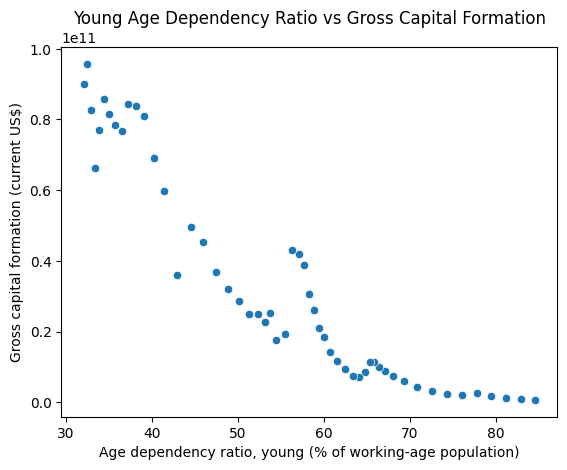

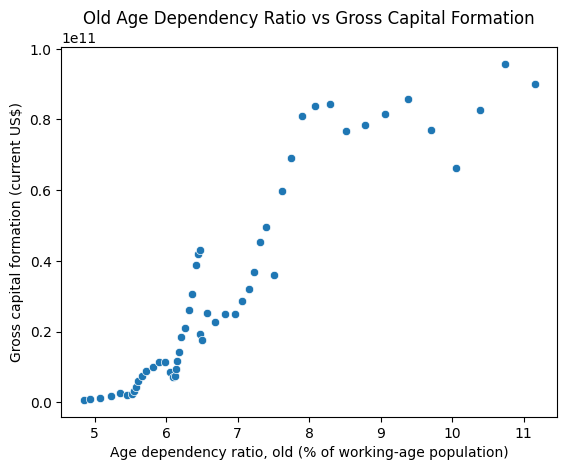

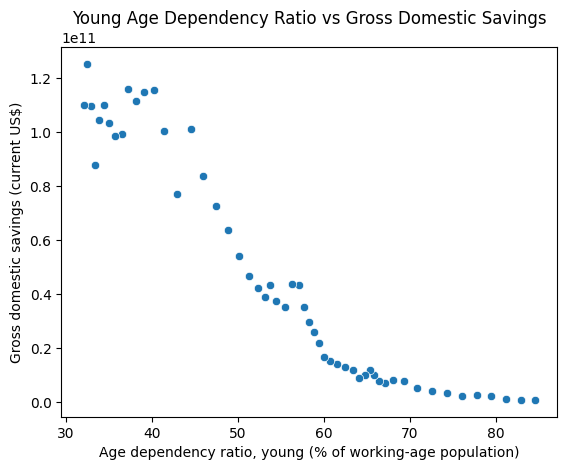

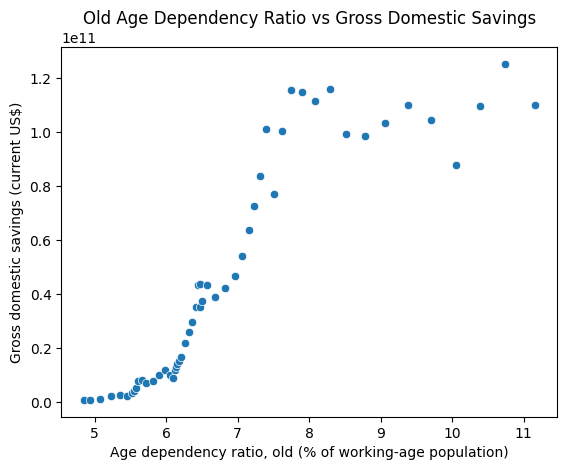

In [135]:
# Scatter plot for young age dependency ratio vs gross capital formation
sns.scatterplot(data=data_subset,
                x='Age dependency ratio, young (% of working-age population)',
                y='Gross capital formation (current US$)')
plt.title('Young Age Dependency Ratio vs Gross Capital Formation')
plt.show()

# Scatter plot for old age dependency ratio vs gross capital formation
sns.scatterplot(data=data_subset,
                x='Age dependency ratio, old (% of working-age population)',
                y='Gross capital formation (current US$)')
plt.title('Old Age Dependency Ratio vs Gross Capital Formation')
plt.show()

# Scatter plot for young age dependency ratio vs gross domestic savings
sns.scatterplot(data=data_subset,
                x='Age dependency ratio, young (% of working-age population)',
                y='Gross domestic savings (current US$)')
plt.title('Young Age Dependency Ratio vs Gross Domestic Savings')
plt.show()

# Scatter plot for old age dependency ratio vs gross domestic savings
sns.scatterplot(data=data_subset,
                x='Age dependency ratio, old (% of working-age population)',
                y='Gross domestic savings (current US$)')
plt.title('Old Age Dependency Ratio vs Gross Domestic Savings')
plt.show()


***Objective 2: Assessing the Influence of Rural and Urban Population Growth on Economic Formation***

In [101]:
# Correlation between urban population growth and gross capital formation
urban_corr = subset_scaled[['Urban population growth (annual %)', 
                               'Gross capital formation (current US$)']].corr()

# Correlation between rural population growth and gross capital formation
rural_corr = subset_scaled[['Rural population growth (annual %)', 
                               'Gross capital formation (current US$)']].corr()




In [102]:
print("Urban Population Growth and Gross Capital Formation Correlation:\n", urban_corr)
print("\nRural Population Growth and Gross Capital Formation Correlation:\n", rural_corr)

Urban Population Growth and Gross Capital Formation Correlation:
                                        Urban population growth (annual %)  \
Urban population growth (annual %)                               1.000000   
Gross capital formation (current US$)                           -0.900580   

                                       Gross capital formation (current US$)  
Urban population growth (annual %)                                 -0.900580  
Gross capital formation (current US$)                               1.000000  

Rural Population Growth and Gross Capital Formation Correlation:
                                        Rural population growth (annual %)  \
Rural population growth (annual %)                               1.000000   
Gross capital formation (current US$)                           -0.882178   

                                       Gross capital formation (current US$)  
Rural population growth (annual %)                                 -0.882178  
Gross ca

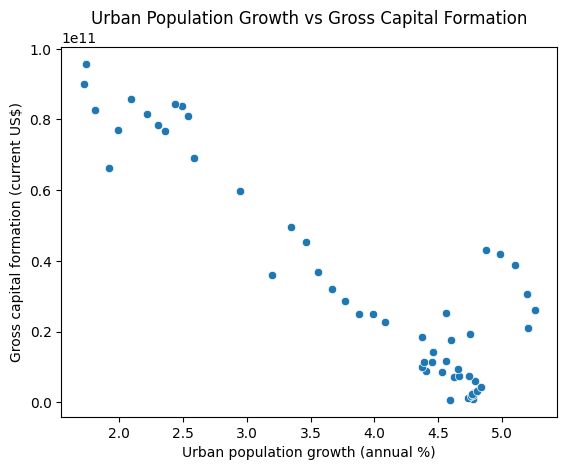

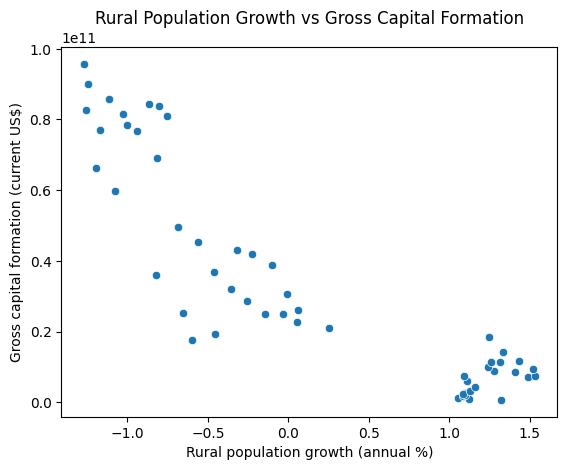

In [136]:
# Scatter plot for urban population growth vs gross capital formation
sns.scatterplot(data=data_subset,
                x='Urban population growth (annual %)',
                y='Gross capital formation (current US$)')
plt.title('Urban Population Growth vs Gross Capital Formation')
plt.show()

# Scatter plot for rural population growth vs gross capital formation
sns.scatterplot(data=data_subset,
                x='Rural population growth (annual %)',
                y='Gross capital formation (current US$)')
plt.title('Rural Population Growth vs Gross Capital Formation')
plt.show()


In [140]:
# Testing the significance of urban vs rural population growth on savings

# Extract data for t-test
urban_growth = data_subset['Urban population growth (annual %)']
rural_growth = data_subset['Rural population growth (annual %)']

# Perform t-test
t_stat, p_val = stats.ttest_ind(urban_growth, rural_growth)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: 18.585724466482247
P-value: 3.918452206106677e-35


***Objective 3: Exploring How Lending Interest Rates Impact Savings and Capital Formation***

In [105]:
# Correlation between lending interest rates and gross capital formation
lending_capital_corr = subset_scaled[['Lending interest rate (%)', 
                                         'Gross capital formation (current US$)']].corr()

# Correlation between lending interest rates and gross domestic savings
lending_savings_corr = subset_scaled[['Lending interest rate (%)', 
                                         'Gross domestic savings (current US$)']].corr()

print("Lending Interest Rate and Gross Capital Formation Correlation:\n", lending_capital_corr)
print("\nLending Interest Rate and Gross Domestic Savings Correlation:\n", lending_savings_corr)


Lending Interest Rate and Gross Capital Formation Correlation:
                                        Lending interest rate (%)  \
Lending interest rate (%)                               1.000000   
Gross capital formation (current US$)                  -0.832727   

                                       Gross capital formation (current US$)  
Lending interest rate (%)                                          -0.832727  
Gross capital formation (current US$)                               1.000000  

Lending Interest Rate and Gross Domestic Savings Correlation:
                                       Lending interest rate (%)  \
Lending interest rate (%)                              1.000000   
Gross domestic savings (current US$)                  -0.887025   

                                      Gross domestic savings (current US$)  
Lending interest rate (%)                                        -0.887025  
Gross domestic savings (current US$)                              1.000000

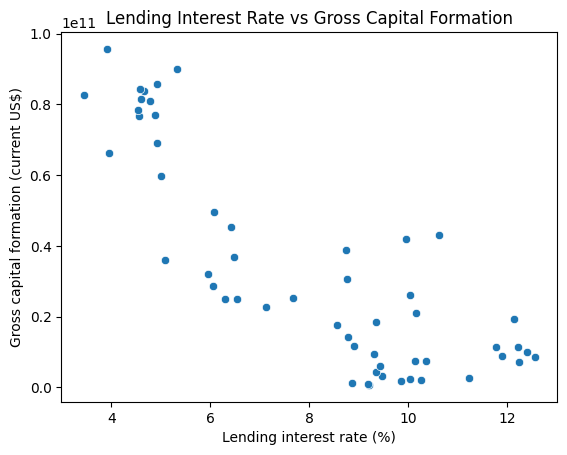

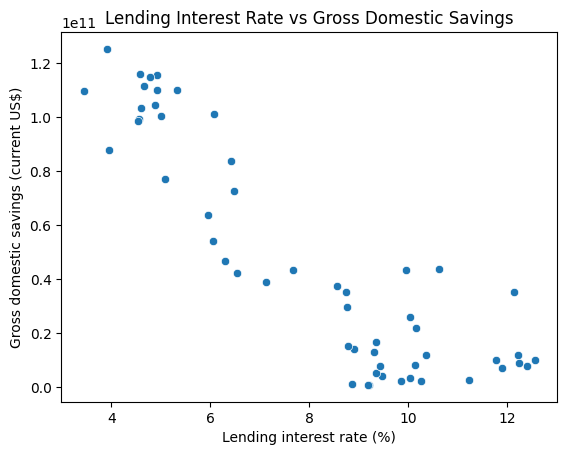

In [141]:
# Scatter plot for lending interest rate vs gross capital formation
sns.scatterplot(data=data_subset,
                x='Lending interest rate (%)',
                y='Gross capital formation (current US$)')
plt.title('Lending Interest Rate vs Gross Capital Formation')
plt.show()

# Scatter plot for lending interest rate vs gross domestic savings
sns.scatterplot(data=data_subset,
                x='Lending interest rate (%)',
                y='Gross domestic savings (current US$)')
plt.title('Lending Interest Rate vs Gross Domestic Savings')
plt.show()


***Objective 4: Investigating How GDP Per Capita Influences Savings and Capital Formation***

In [107]:
# Correlation between GDP per capita and gross capital formation
gdp_capital_corr = subset_scaled[['GDP per capita (current US$)', 
                                     'Gross capital formation (current US$)']].corr()

# Correlation between GDP per capita and gross domestic savings
gdp_savings_corr = subset_scaled[['GDP per capita (current US$)', 
                                     'Gross domestic savings (current US$)']].corr()



In [108]:
print("GDP per Capita and Gross Capital Formation Correlation:\n", gdp_capital_corr)
print("\nGDP per Capita and Gross Domestic Savings Correlation:\n", gdp_savings_corr)


GDP per Capita and Gross Capital Formation Correlation:
                                        GDP per capita (current US$)  \
GDP per capita (current US$)                               1.000000   
Gross capital formation (current US$)                      0.985529   

                                       Gross capital formation (current US$)  
GDP per capita (current US$)                                        0.985529  
Gross capital formation (current US$)                               1.000000  

GDP per Capita and Gross Domestic Savings Correlation:
                                       GDP per capita (current US$)  \
GDP per capita (current US$)                              1.000000   
Gross domestic savings (current US$)                      0.988336   

                                      Gross domestic savings (current US$)  
GDP per capita (current US$)                                      0.988336  
Gross domestic savings (current US$)                              1.00

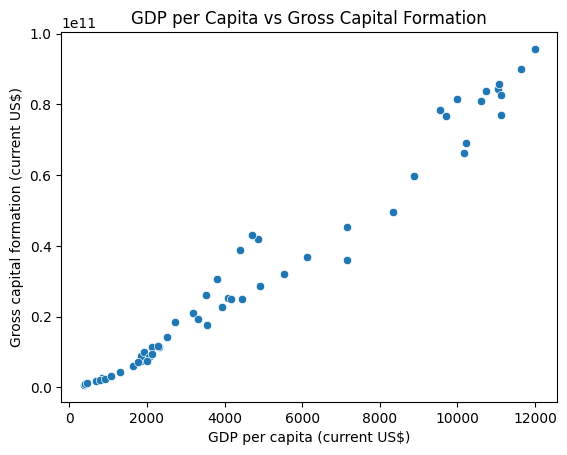

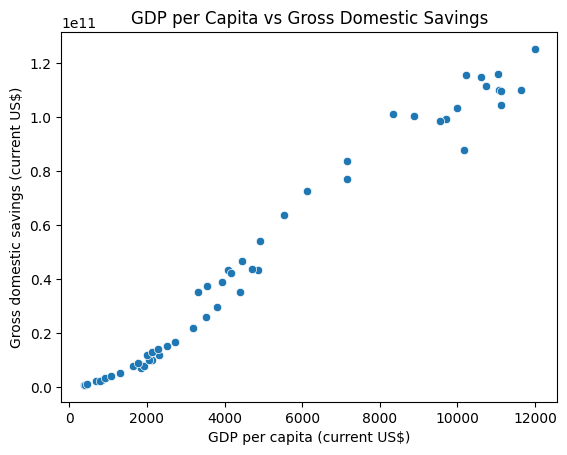

In [142]:
# Scatter plot for GDP per capita vs gross capital formation
sns.scatterplot(data=data_subset,
                x='GDP per capita (current US$)',
                y='Gross capital formation (current US$)')
plt.title('GDP per Capita vs Gross Capital Formation')
plt.show()

# Scatter plot for GDP per capita vs gross domestic savings
sns.scatterplot(data=data_subset,
                x='GDP per capita (current US$)',
                y='Gross domestic savings (current US$)')
plt.title('GDP per Capita vs Gross Domestic Savings')
plt.show()


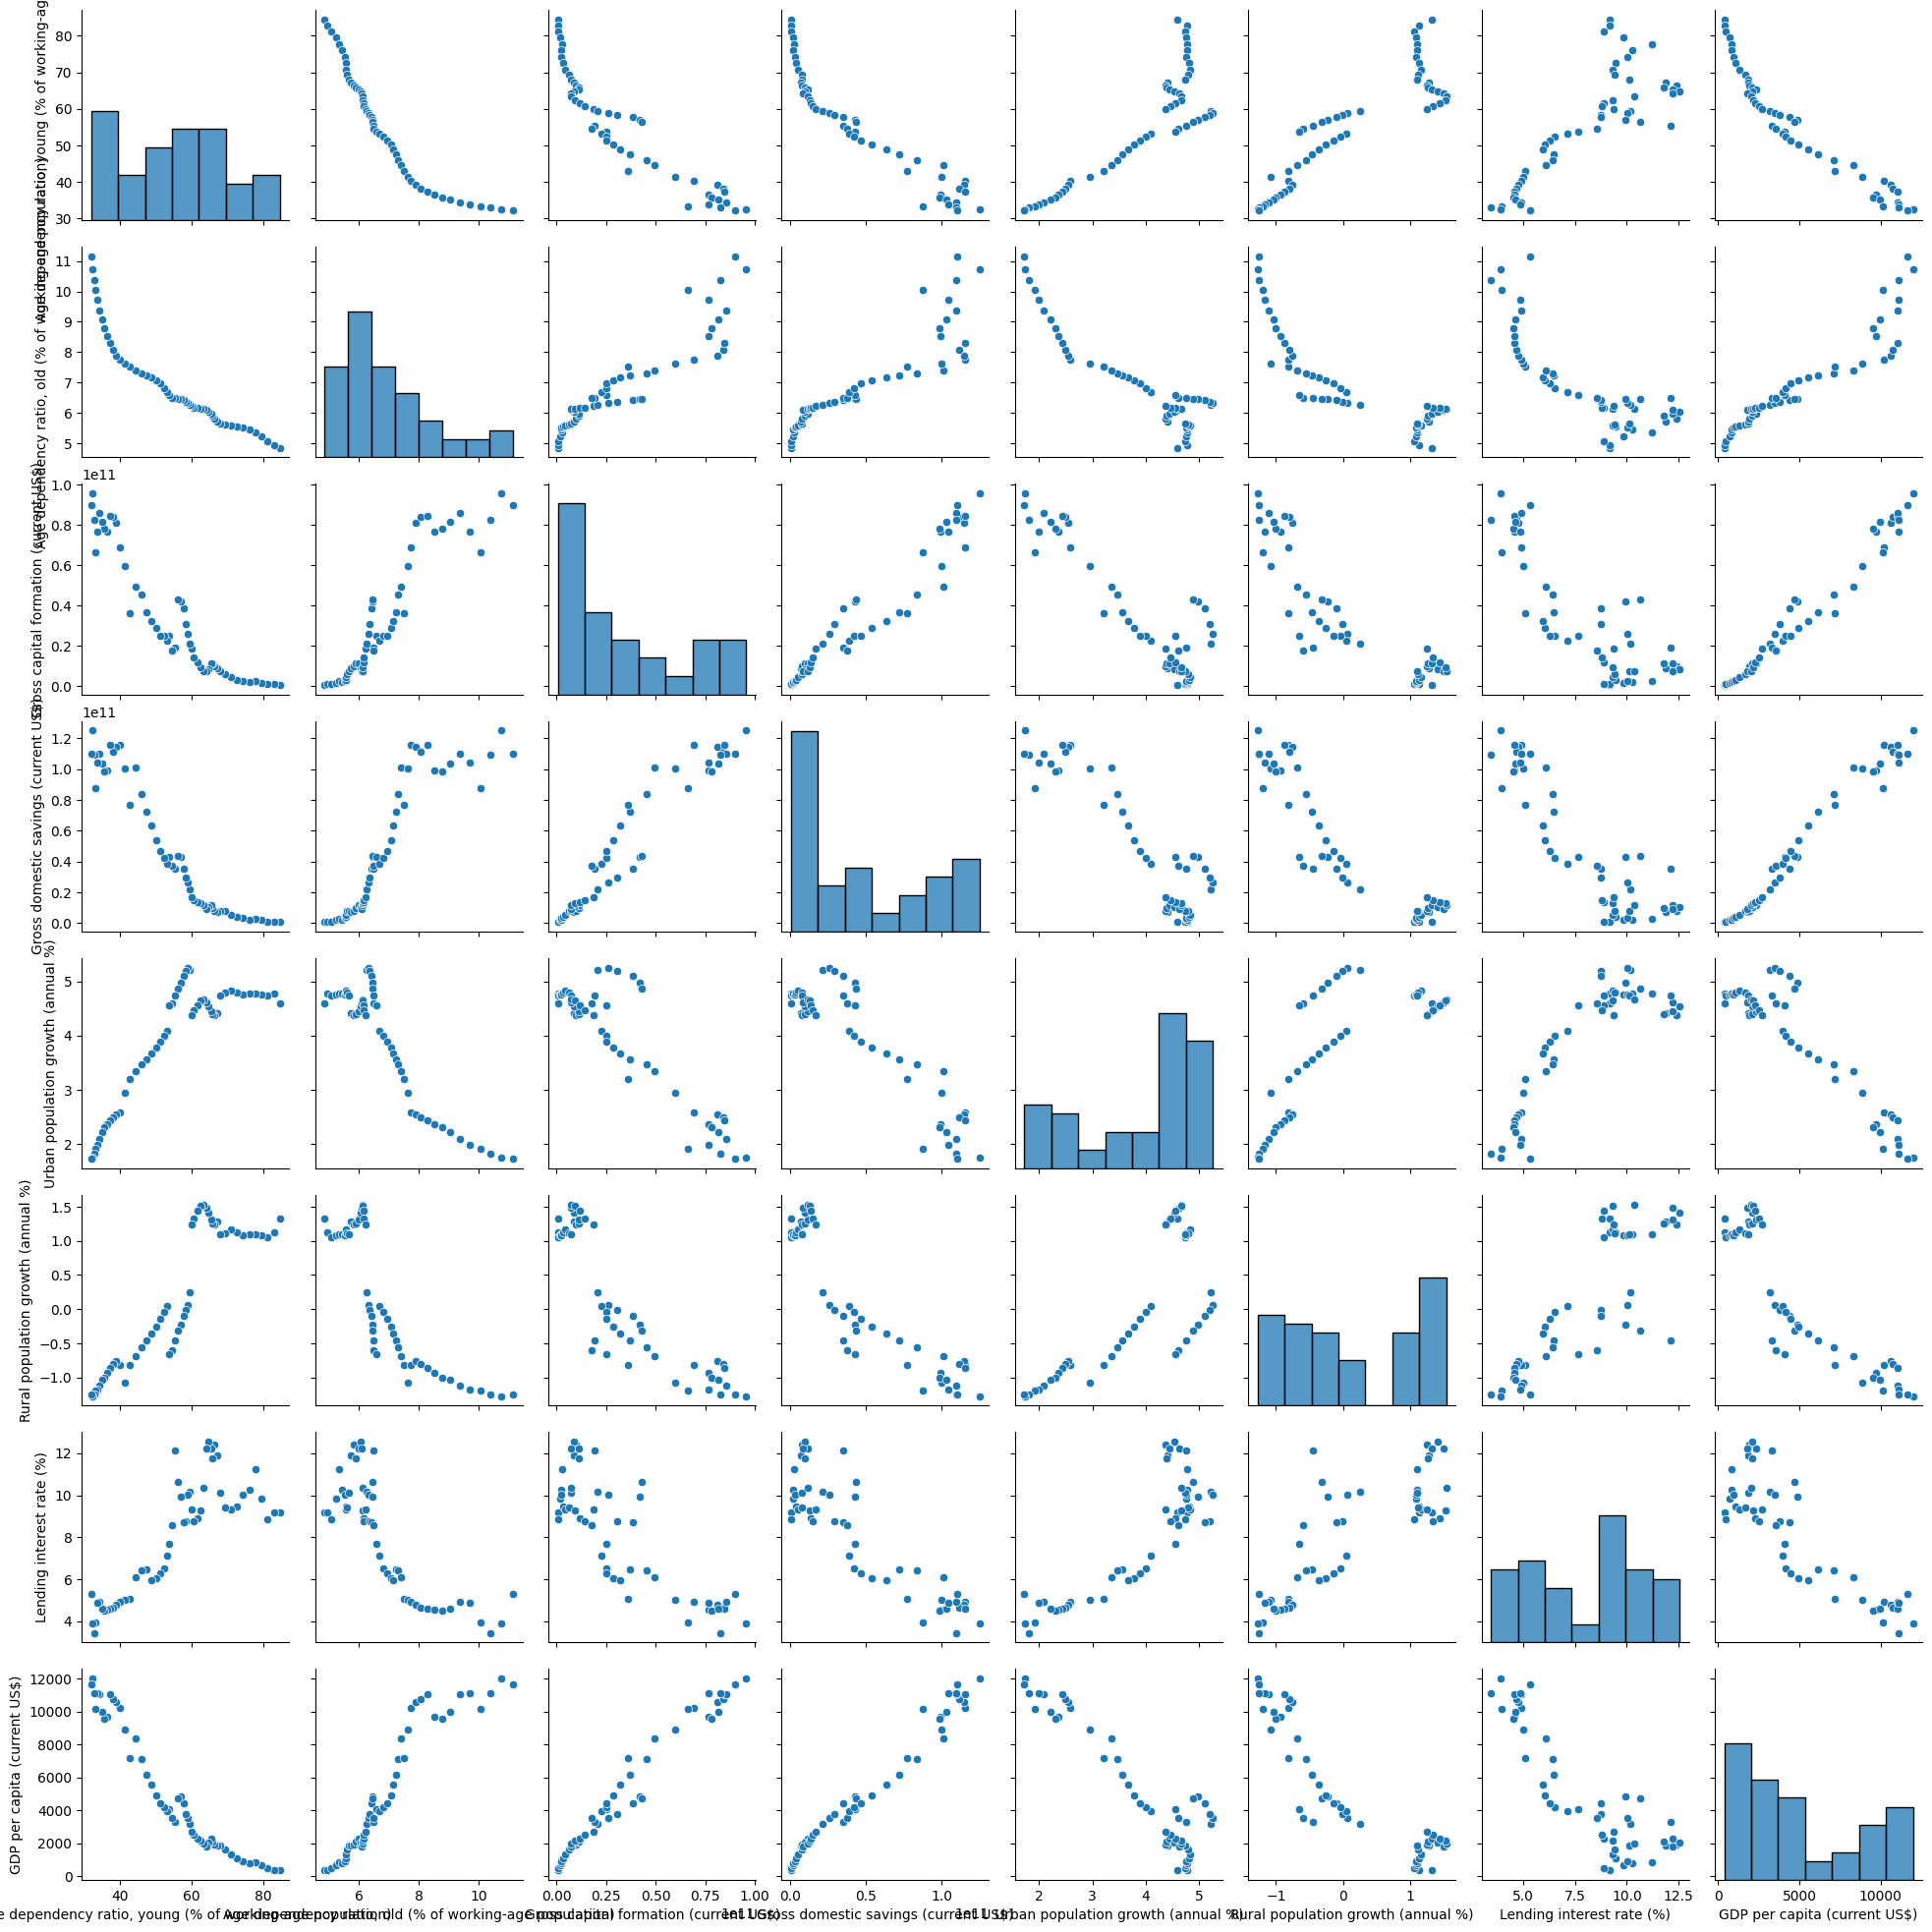

In [143]:
# Create the pairplot
sns.pairplot(data_subset)

plt.show()

#### 5.3 Insights

<ol>
    <ul><strong>1. Age Dependency Ratios and Economic Performance:</strong><br>
Young Age Dependency Ratio:<br> There is a negative correlation between the young age dependency ratio and both gross capital formation and gross domestic savings. This suggests that as the percentage of young dependents decreases, there is more room for capital formation and savings in the economy. Essentially, a lower young dependency ratio seems to facilitate more economic growth.<br>
<br>Old Age Dependency Ratio:<br> There is a positive correlation between the old age dependency ratio and economic indicators, including gross capital formation and savings. This implies that economies with higher elderly populations are likely saving more and investing more in capital formation, possibly in response to aging populations preparing for retirement.
    </ul><br>
    <ul><strong>2. Urban and Rural Population Growth vs Gross Capital Formation:</strong><br>
Urban Population Growth:<br> There is a negative correlation between urban population growth and gross capital formation. Rapid urbanization may initially strain resources, slowing the rate of capital formation.<br>
<br>Rural Population Growth:<br> Similarly, rural population growth also shows a negative correlation with gross capital formation, indicating that both urban and rural population growth could be linked to a reduction in available capital for investment.
    </ul><br>
    <ul><strong>3. Lending Interest Rate Impact:</strong><br>
Lending Interest Rate vs Gross Capital Formation:<br> There is a strong negative correlation between lending interest rates and gross capital formation. This is expected, as higher lending rates can make borrowing more expensive, reducing investment in capital projects.<br>
<br>Lending Interest Rate vs Domestic Savings:<br> Similarly, there is a negative relationship between lending interest rates and domestic savings. Higher interest rates discourage borrowing, but in this case, may also reduce overall economic savings.
    </ul><br>
    <ul><strong>4. GDP per Capita and Economic Growth:</strong><br>
GDP per Capita shows a positive correlation with both gross capital formation and gross domestic savings. This means that as the economy grows and per capita income increases, more resources are allocated to savings and investment in infrastructure and capital goods, driving future economic growth.
    </ul><br>
    <br><ul><strong>Overall Insights:</strong><br>
        Age dependency ratios play a significant role in shaping economic performance. Countries with lower young age dependency ratios tend to have more capital formation and savings, while an aging population could drive more savings for future consumption.
Population growth, both urban and rural, appears to put pressure on capital formation, suggesting that infrastructure and capital investment may struggle to keep up with population increases.
Lending interest rates have a strong impact on both savings and capital formation, with higher rates generally dampening economic activity in these areas.
GDP per capita is positively linked to economic growth indicators, reinforcing the idea that wealthier economies can afford more savings and capital investment.<br>
        <br>
        These insights suggest that managing demographic shifts and interest rates are key levers for promoting sustainable economic growth.
    </ul>
</ol>

<h3>Conclusion</h3>

#### 6.1 Summary of Findings

1. Relationships Between Lending Interest Rates, Capital Formation, and Savings:
   - Negative Correlation: Lending interest rates exhibit a negative correlation with both gross capital formation and gross domestic savings. As interest rates increase, both savings and investments in the economy tend to decrease, likely due to higher borrowing costs.
   - Correlation Coefficients: Lending interest rates and capital formation have a high negative correlation of -0.83, while the correlation with savings is -0.88.
   - Insight: This confirms the traditional economic theory that higher lending interest rates can suppress economic growth by discouraging investments and savings.

2. Impact of Age Dependency Ratios:
   - Old Age Dependency Ratio: The old age dependency ratio (the proportion of elderly people) shows a positive correlation with both gross capital formation (0.93) and domestic savings (0.91). This suggests that economies with higher elderly populations tend to save more and also have higher levels of capital formation.
   - Young Age Dependency Ratio: In contrast, the young age dependency ratio (the proportion of younger dependents) shows a negative correlation with both capital formation (-0.93) and domestic savings (-0.94). 
   - Insight: This reflects that a higher burden of younger dependents may strain resources, reducing both savings and investments.

3. Population Growth (Urban vs Rural):
   - Urban Population Growth: The urban population growth shows a negative correlation with gross capital formation (-0.88). This suggests that rapid urbanization might be accompanied by reduced capital investments, likely due to resource allocation toward urban infrastructure and services.
   - Rural Population Growth: Rural population growth also has a negative impact on capital formation, but the magnitude is slightly lower (-0.77). 
   - Insight: The continuous shift from rural to urban areas in developing economies might lead to short-term declines in capital investments.

4. GDP Per Capita and Its Strong Influence:
   - Positive Correlation: GDP per capita is strongly positively correlated with both gross capital formation (0.99) and gross domestic savings (0.98). Higher income levels in an economy tend to increase both savings and investments, fostering economic growth.
   - Insight: This reinforces the understanding that wealthier economies tend to invest and save more, suggesting the critical role of income in driving capital formation and economic growth.

5. Trends Over Time (Time-Series Analysis):
   - Urban Population Growth: There is a significant decline in urban population growth over time. From the mid-20th century, urbanization rates peaked but have since been decreasing steadily.
   - Age Dependency (Old): The old age dependency ratio has consistently risen, especially from the 1980s onward, indicating aging populations.
   - Savings and Capital Formation: Both gross domestic savings and gross capital formation have increased significantly over the past few decades, with fluctuations aligned to macroeconomic cycles.
   - Lending Interest Rates: Interest rates have fluctuated over time, peaking during certain financial crises and gradually decreasing in recent years.
   - Insight: The time-series analysis suggests a transformation in demographic structures and economic conditions that influence lending, savings, and investment behaviors. Aging populations and declining urban growth could reshape future economic strategies.


6. Correlation Heatmap Findings:
   - High Correlations: The correlation matrix reveals high correlations among the variables, especially between GDP per capita, capital formation, and savings, all above 0.90. This suggests that GDP is a primary driver of both savings and investments.
   - Negative Correlations: Conversely, urbanization, rural population growth, and young age dependency ratios are negatively correlated with economic outcomes like savings and capital formation.
   - Insight: The dependency ratios and population dynamics play a vital role in shaping economic output and financial decisions, highlighting the importance of demographic analysis in economic modeling.


Key Insights:
- Higher interest rates reduce both savings and investment (capital formation), thus affecting economic growth.
- Aging populations (higher old age dependency) may positively affect savings and capital formation, while higher young age dependency tends to negatively impact both.
- Urbanization and rural-to-urban migration pose challenges for maintaining high levels of capital formation, likely due to the economic shifts that accompany this demographic change.
- GDP per capita stands out as the most significant predictor of economic health, showing strong positive correlations with both domestic savings and capital formation.

#### 6.2 Future Work

1. Investigating Non-Linear Relationships:
   Many plots, particularly those related to urban population growth, age dependency ratios, and lending interest rates, show non-linear trends. Future models should consider using non-linear regression techniques like polynomial regression or logarithmic transformations to capture these relationships more accurately.

2. Time-Series Analysis:
   The trends over time for key variables such as urban/rural population growth, GDP per capita, gross capital formation, and domestic savings suggest that these variables evolve differently over time. Implementing time-series forecasting models (e.g., ARIMA, SARIMA, or Prophet) could help predict future trends in savings, investments, and population growth. Analyzing seasonality or long-term trends would provide more insightful economic forecasts.

3. Exploration of Economic Indicators:
   Additional economic indicators such as inflation rate, unemployment rate, public sector investment, or fiscal policy variables (e.g., government debt, taxation) can be introduced. These factors could add depth to the analysis, particularly in understanding the relationship between lending interest rates, savings, and capital formation.

<h3>7. References</h3>

1. Data, R., & W3Schools. (2019). Python Tutorial. W3schools.com. https://www.w3schools.com/python/

2. Department of Statistics Malaysia. (2024). MINISTRY OF ECONOMY DEPARTMENT OF STATISTICS MALAYSIA NOVEMBER 2023 LABOUR FORCE STATISTICS REPORT. https://storage.dosm.gov.my/labour/lfs_month_2023-11_en.pdf

3. Feyen, E., & Huertas, I. (2020). Bank Lending Rates and Spreads in EMDEs Evolution, Drivers, and Policies. https://documents1.worldbank.org/curated/en/993931599674780457/pdf/Bank-Lending-Rates-and-Spreads-in-EMDEs-Evolution-Drivers-and-Policies.pdf

4. Hunter, J., Dale, D., Firing , E., & Droettboom , M. (2024). Plot types — Matplotlib 3.5.2 documentation. Matplotlib.org. https://matplotlib.org/stable/plot_types/index.html

5. Nambiar, S. (2009). ADBI Working Paper Series Malaysia and the Global Crisis: Impact, Response, and Rebalancing Strategies Asian Development Bank Institute. https://www.adb.org/sites/default/files/publication/156003/adbi-wp148.pdf

6. Ngah, N. N., Mohamad, S. F. S., Wahab, W., Yusuf, M. M., & Khir, M. F. A. (2023). Analysis of lending interest rate and economic activities in Malaysia. The 5TH ISM INTERNATIONAL STATISTICAL CONFERENCE 2021 (ISM-V): Statistics in the Spotlight: Navigating the New Norm, Volume 2500(Issue 1). https://doi.org/10.1063/5.0112410

7. NumFOCUS, Inc. (2024). pandas.DataFrame.clip — pandas 2.2.2 documentation. Pandas.pydata.org. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.clip.html

8. OVHcloud, & NumFOCUS, Inc. (2024). pandas.Series.value_counts — pandas 2.0.0 documentation. Pandas.pydata.org. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

9. Parthmanchanda81, G. (2021, October 16). Libraries in Python. GeeksforGeeks. https://www.geeksforgeeks.org/libraries-in-python/

10. Rasiah, R., Thye Woo, W., & Heald Perkins, D. (2017). Explaining Malaysia’s Past Economic Growth and Future Prospects. Jeffrey Cheah Institute on Southeast Asia, Working Paper No. 2. https://sunwayuniversity.edu.my/sites/default/files/publications/2023-11/jci-wp2.pdf

11. The World Bank Group. (2023). Malaysia | data. Worldbank.org. https://data.worldbank.org/country/malaysia

12. URBAN GROWTH AND DEVELOPMENT IN MALAYSIA. (1997). https://www.ide.go.jp/library/English/Publish/Reports/Apec/pdf/1997_15.pdf

13. W3schools, & Data, R. (2019). HTML Styles. W3schools.com. https://www.w3schools.com/html/html_styles.asp